In [ ]:
import os
import pandas as pd

# Directories containing the TSV files
russian_directory = '/nas/eclairnas01/users/pgerard/df_chunks_pro_russian'
ukrainian_directory = '/nas/eclairnas01/users/pgerard/df_chunks_pro_ukrainian'

# List to hold final combined dataframes
russian_dataframes = []
ukrainian_dataframes = []

# Columns to merge from the mft file
mft_columns = ['post_id', 'Non-Moral', 'Purity', 'Thin Morality', 'Authority', 
               'Equality', 'Loyalty', 'Care', 'Proportionality']

# Function to merge the part/chunk file with its corresponding mft file based on post_id
def merge_with_mft(part_df, mft_df):
    # Keep only the necessary columns from mft file
    mft_df_selected = mft_df[mft_columns]
    # Merge on 'post_id' (align rows based on matching post_id)
    merged_df = pd.merge(part_df, mft_df_selected, on='post_id', how='left')
    return merged_df

# Processing Russian files
for filename in os.listdir(russian_directory):
    if filename.endswith("classified_with_logits_ru_no_system_prompt_v2.tsv") and "mft" not in filename:
        part_file_path = os.path.join(russian_directory, filename)
        # Construct the corresponding mft file path
        mft_filename = filename.replace("_v2.tsv", "_v2_mft.tsv")
        mft_file_path = os.path.join(russian_directory, mft_filename)
        
        if os.path.exists(mft_file_path):
            print(f'Merging {filename} with {mft_filename}')
            # Read the part file and the mft file
            part_df = pd.read_csv(part_file_path, sep='\t')
            mft_df = pd.read_csv(mft_file_path, sep='\t')
            # Merge the part file with its corresponding mft file (only selected columns)
            merged_df = merge_with_mft(part_df, mft_df)
            russian_dataframes.append(merged_df)
        else:
            print(f'No corresponding mft file found for {filename}')
        # break

# Processing Ukrainian files
for filename in os.listdir(ukrainian_directory):
    if filename.endswith("_no_system_prompt.tsv") and "mft" not in filename:
        chunk_file_path = os.path.join(ukrainian_directory, filename)
        # Construct the corresponding mft file path
        mft_filename = filename.replace("_classified_with_logits_uk_model_no_system_prompt.tsv", "_classified_with_logits_mft.tsv")
        mft_file_path = os.path.join(ukrainian_directory, mft_filename)
        
        if os.path.exists(mft_file_path):
            print(f'Merging {filename} with {mft_filename}')
            # Read the chunk file and the mft file
            chunk_df = pd.read_csv(chunk_file_path, sep='\t')
            mft_df = pd.read_csv(mft_file_path, sep='\t')
            # Merge the chunk file with its corresponding mft file (only selected columns)
            merged_df = merge_with_mft(chunk_df, mft_df)
            ukrainian_dataframes.append(merged_df)
        else:
            print(f'No corresponding mft file found for {filename}')

# Concatenate all the merged Russian and Ukrainian dataframes
combined_df_ru = pd.concat(russian_dataframes, ignore_index=True)
# combined_df_uk = pd.concat(ukrainian_dataframes, ignore_index=True)

Merging split_df_part_1_classified_with_logits_ru_no_system_prompt_v2.tsv with split_df_part_1_classified_with_logits_ru_no_system_prompt_v2_mft.tsv
Merging split_df_part_2_classified_with_logits_ru_no_system_prompt_v2.tsv with split_df_part_2_classified_with_logits_ru_no_system_prompt_v2_mft.tsv


In [2]:
combined_df_ru.columns

Index(['user', 'post_id', 'url', 'title', 'image_url', 'description', 'views',
       'date', 'channel_name', 'channel_label', 'cleaned_description',
       'cleaned_sentences', 'Threats to Culture or Identity',
       'Threats to Survival or Physical Security',
       'Vilification/Villainization', 'Explicit Dehumanization', 'None',
       'classifications', 'explanation', 'Non-Moral', 'Purity',
       'Thin Morality', 'Authority', 'Equality', 'Loyalty', 'Care',
       'Proportionality'],
      dtype='object')

In [ ]:
import psutil

# Get the total memory in GB
total_memory = psutil.virtual_memory().total / (1024 ** 3)

# Get the available memory in GB
available_memory = psutil.virtual_memory().available / (1024 ** 3)

print(f"Total memory: {total_memory:.2f} GB")
print(f"Available memory: {available_memory:.2f} GB")

In [14]:
unique_channel_names = merged_df['channel_name'].unique()

# Display the unique channel names
len(unique_channel_names)

568

In [3]:
combined_df = pd.concat([combined_df_uk, combined_df_ru], ignore_index=True)

In [ ]:
import pandas as pd

# Define the function to apply thresholds and create binary columns
def apply_thresholds(df, thresholds):
    """
    Takes a DataFrame and a dictionary of thresholds, returns a DataFrame
    with binary columns (0 or 1) based on whether the value meets or exceeds the threshold.
    
    Parameters:
    - df: DataFrame containing the columns to be thresholded
    - thresholds: dictionary where keys are column names and values are the threshold
    
    Returns:
    - df_binary: DataFrame with binary columns
    """
    df_binary = df.copy()
    
    for column, threshold in thresholds.items():
        df_binary[column] = (df_binary[column] >= threshold).astype(int)
    
    return df_binary

# Example usage:
# Define the thresholds for each column
thresholds = {
    'Non-Moral': 0.4,
    'Purity': 0.4,
    'Thin Morality': 0.4,
    'Authority': 0.4,
    'Equality': 0.4,
    'Loyalty': 0.4,
    'Care': 0.4,
    'Proportionality': 0.4,
    'Threats to Culture or Identity': 0.5,
    'Threats to Survival or Physical Security': 0.5,
    'Vilification/Villainization': 0.3,
    'Explicit Dehumanization': 0.2
}

# Assuming merged_df is the DataFrame we want to apply this to:
# df_binary = apply_thresholds(merged_df, thresholds)
# df_binary_uk = apply_thresholds(combined_df_uk, thresholds)
thresholds = {
    'Non-Moral': 0.4,
    'Purity': 0.4,
    'Thin Morality': 0.4,
    'Authority': 0.4,
    'Equality': 0.4,
    'Loyalty': 0.4,
    'Care': 0.4,
    'Proportionality': 0.4,
    'Threats to Culture or Identity': 0.5,
    'Threats to Survival or Physical Security': 0.8,
    'Vilification/Villainization': 0.8,
    'Explicit Dehumanization': 0.2
}
df_binary_ru = apply_thresholds(combined_df_ru, thresholds)

In [21]:
combined_df_ru.columns

Index(['user', 'post_id', 'url', 'title', 'image_url', 'description', 'views',
       'date', 'channel_name', 'channel_label', 'cleaned_description',
       'cleaned_sentences', 'Threats to Culture or Identity',
       'Threats to Survival or Physical Security',
       'Vilification/Villainization', 'Explicit Dehumanization', 'None',
       'classifications', 'explanation', 'Non-Moral', 'Purity',
       'Thin Morality', 'Authority', 'Equality', 'Loyalty', 'Care',
       'Proportionality'],
      dtype='object')

In [48]:
df_binary_uk.columns

Index(['user', 'post_id', 'url', 'title', 'image_url', 'description', 'views',
       'date', 'channel_name', 'channel_label', 'cleaned_description',
       'cleaned_sentences', 'classifications', 'explanation',
       'Threats to Culture or Identity',
       'Threats to Survival or Physical Security',
       'Vilification/Villainization', 'Explicit Dehumanization', 'None',
       'Non-Moral', 'Purity', 'Thin Morality', 'Authority', 'Equality',
       'Loyalty', 'Care', 'Proportionality'],
      dtype='object')

In [24]:
# combined_df_ru['Authority_x']
combined_df_ru['Authority']
combined_df_ru['Threats to Culture or Identity'].head(20)

0     0.002083
1     0.002083
2     0.002083
3     0.002083
4     0.002083
5     0.002083
6     0.002083
7     0.002083
8     0.002083
9     0.002083
10    0.002083
11    0.002083
12    0.002083
13    0.002083
14    0.002083
15    0.002083
16    0.002083
17    0.002083
18    0.045353
19    0.045353
Name: Threats to Culture or Identity, dtype: float64

### Likelihoods

In [25]:
import pandas as pd

def analyze_otherism_and_morality(df, otherism_columns, morality_columns):
    # Create binary columns for "otherism" and "morality"
    df['Any_Otherism_Present'] = df[otherism_columns].max(axis=1)
    df['Any_Morality_Present'] = df[morality_columns].max(axis=1)
    
    # Convert to binary (0 or 1)
    df['Any_Otherism_Present'] = df['Any_Otherism_Present'].apply(lambda x: 1 if x > 0 else 0)
    df['Any_Morality_Present'] = df['Any_Morality_Present'].apply(lambda x: 1 if x > 0 else 0)
    
    # # Calculate overall probabilities
    total_messages = len(df)
    total_morality = df['Any_Morality_Present'].sum()
    total_otherism = df['Any_Otherism_Present'].sum()
    morality_given_otherism = df[df['Any_Otherism_Present'] == 1]['Any_Morality_Present'].sum()

    prob_morality = total_morality / total_messages
    prob_morality_given_otherism = morality_given_otherism / total_otherism if total_otherism > 0 else 0

    # Initialize a dictionary to hold probabilities for each moral device
    moral_device_probs = {}

    for column in morality_columns:
        # Calculate P(Device) and P(Device | Otherism)
        total_device = df[column].sum()
        device_given_otherism = df[df['Any_Otherism_Present'] == 1][column].sum()

        prob_device = total_device / total_messages
        prob_device_given_otherism = device_given_otherism / total_otherism if total_otherism > 0 else 0

        moral_device_probs[column] = {
            "P(Device)": prob_device,
            "P(Device | Otherism)": prob_device_given_otherism
        }
    
    # Sort moral devices by the likelihood of application given otherism
    sorted_moral_device_probs = sorted(moral_device_probs.items(), 
                                       key=lambda x: x[1]["P(Device | Otherism)"], 
                                       reverse=True)

    # Initialize a dictionary to hold probabilities for each otherism class
    otherism_morality_probs = {}

    for column in otherism_columns:
        # Calculate P(Morality | Specific Otherism)
        total_specific_otherism = df[column].sum()
        morality_given_specific_otherism = df[df[column] == 1]['Any_Morality_Present'].sum()
        
        prob_morality_given_specific_otherism = (morality_given_specific_otherism / 
                                                 total_specific_otherism if total_specific_otherism > 0 else 0)
        
        otherism_morality_probs[column] = prob_morality_given_specific_otherism
    
    results = {
        "Total Messages": total_messages,
        "Total Morality Messages": total_morality,
        "Total Otherism Messages": total_otherism,
        "Morality Given Otherism": morality_given_otherism,
        "P(Morality)": prob_morality,
        "P(Morality | Otherism)": prob_morality_given_otherism,
        "Moral Device Probabilities": sorted_moral_device_probs,
        "Otherism Morality Probabilities": otherism_morality_probs
    }
    
    return results

# Example usage:
otherism_columns = [
    'Threats to Culture or Identity',
    'Threats to Survival or Physical Security',
    'Vilification/Villainization',
    'Explicit Dehumanization'
]

morality_columns = [
    'Purity',
    # 'Thin Morality',
    'Authority',
    'Equality',
    'Loyalty',
    'Care',
    'Proportionality'
]

# results = analyze_otherism_and_morality(df_binary_ru, otherism_columns, morality_columns)
results = analyze_otherism_and_morality(df_binary_ru, otherism_columns, morality_columns)
# results = analyze_otherism_and_morality(df_binary_uk, otherism_columns, morality_columns)

print("Overall Results:")
print(f"Total Messages: {results['Total Messages']}")
print(f"P(Morality): {results['P(Morality)']}")
print(f"P(Morality | Otherism): {results['P(Morality | Otherism)']}")
print("\nMoral Device Probabilities Given Otherism:")
for device, prob in results['Moral Device Probabilities']:
    print(f"{device}: P(Device | Otherism) = {prob['P(Device | Otherism)']}, P(Device) = {prob['P(Device)']}")

print("\nLikelihood of Any Morality Given Specific Otherism:")
for otherism, prob in results['Otherism Morality Probabilities'].items():
    percentage_jump = ((prob - results['P(Morality)']) / results['P(Morality)']) * 100
    print(f"P(Morality | {otherism}) = {prob:.4f} (jump of {percentage_jump:.2f}% from P(Morality) = {results['P(Morality)']:.4f})")


NameError: name 'results' is not defined

In [35]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Function to compute Cramér's V for each morality column
def calculate_cramers_v(df, otherism_col, morality_columns):
    results = {}
    for morality_col in morality_columns:
        contingency_table = pd.crosstab(df[otherism_col], df[morality_col])
        cramer_v = cramers_v(contingency_table.values)
        results[morality_col] = cramer_v
    return results

# Function to calculate Cramér's V for otherism classes against Any_Morality_Present
def calculate_cramers_v_for_otherism(df, otherism_columns):
    results = {}
    for otherism_col in otherism_columns:
        contingency_table = pd.crosstab(df[otherism_col], df['Any_Morality_Present'])
        cramer_v = cramers_v(contingency_table.values)
        results[otherism_col] = cramer_v
    return results

# Filtering based on date range with timezone awareness
def filter_by_date(df, min_date, max_date):
    # Convert min_date and max_date to pandas datetime format and set timezone to UTC
    min_date = pd.to_datetime(min_date).tz_localize('UTC')
    max_date = pd.to_datetime(max_date).tz_localize('UTC')
    
    # Ensure the 'date' column is in datetime format and has UTC timezone
    df['date'] = pd.to_datetime(df['date']).dt.tz_convert('UTC')
    
    # Filter the dataframe based on the date range
    filtered_df = df[(df['date'] >= min_date) & (df['date'] <= max_date)]
    
    return filtered_df

# Parameters for morality columns and otherism columns
morality_columns = ['Purity', 'Authority', 'Equality', 'Loyalty', 'Care', 'Proportionality']
otherism_columns = ['Threats to Culture or Identity', 'Threats to Survival or Physical Security', 'Vilification/Villainization', 'Explicit Dehumanization', 'Any_Otherism_Present']

# Example dates (modify as needed)
min_date = '2022-02-01'
max_date = '2022-02-28'

# Filter the dataframe based on the provided date range
df_filtered = filter_by_date(df_binary_ru, min_date, max_date)

# Add the 'Any_Morality_Present' column
df_filtered['Any_Morality_Present'] = df_filtered[morality_columns].max(axis=1)

# Calculate Cramér's V for each otherism class against Any_Morality_Present
cramers_v_otherism_results = calculate_cramers_v_for_otherism(df_filtered, otherism_columns)

# Output the results
cramers_v_otherism_results

/tmp/ipykernel_2043503/543282593.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Any_Morality_Present'] = df_filtered[morality_columns].max(axis=1)


{'Threats to Culture or Identity': 0.04113167740633833,
 'Threats to Survival or Physical Security': 0.03223713823195471,
 'Vilification/Villainization': 0.053005530673925154,
 'Explicit Dehumanization': 0.02204081492520136,
 'Any_Otherism_Present': 0.06098366924973734}

In [49]:
import pandas as pd

def analyze_otherism_and_morality(df, otherism_columns, morality_columns, min_date=None, max_date=None):
    """
    Analyzes the probabilities of morality given otherism in the data, including the probability
    of using any morality device, the probability of using each otherism class, and the conditional 
    probabilities of any morality given specific otherism classes.

    Parameters:
    - df: DataFrame containing the data to analyze.
    - otherism_columns: List of columns corresponding to otherism categories.
    - morality_columns: List of columns corresponding to morality categories.
    - min_date: Minimum date for filtering the DataFrame (optional).
    - max_date: Maximum date for filtering the DataFrame (optional).

    Returns:
    - Dictionary with overall results and probabilities for each otherism class.
    """

    # Convert date column to datetime if filtering by date
    if min_date or max_date:
        df['date'] = pd.to_datetime(df['date'])
        if min_date:
            df = df[df['date'] >= min_date]
        if max_date:
            df = df[df['date'] <= max_date]

    # Create a binary column for "Any Otherism" and "Any Morality"
    df['Any_Otherism_Present'] = df[otherism_columns].max(axis=1)
    df['Any_Morality_Present'] = df[morality_columns].max(axis=1)

    # Convert to binary (0 or 1)
    df['Any_Otherism_Present'] = df['Any_Otherism_Present'].apply(lambda x: 1 if x > 0 else 0)
    df['Any_Morality_Present'] = df['Any_Morality_Present'].apply(lambda x: 1 if x > 0 else 0)

    # Calculate overall probabilities
    total_messages = len(df)
    total_morality = df['Any_Morality_Present'].sum()
    total_otherism = df['Any_Otherism_Present'].sum()

    prob_morality = total_morality / total_messages

    # Initialize a dictionary to hold probabilities for each otherism class
    otherism_probs = {}
    otherism_morality_probs = {}

    for column in otherism_columns:
        # Calculate P(Otherism_Class)
        total_specific_otherism = df[column].sum()
        prob_specific_otherism = total_specific_otherism / total_messages

        # Calculate P(Any Morality | Otherism_Class)
        morality_given_specific_otherism = df[df[column] == 1]['Any_Morality_Present'].sum()
        prob_morality_given_specific_otherism = (morality_given_specific_otherism / 
                                                 total_specific_otherism if total_specific_otherism > 0 else 0)
        
        otherism_probs[column] = prob_specific_otherism
        otherism_morality_probs[column] = prob_morality_given_specific_otherism

    # Sort otherism classes by their probabilities
    sorted_otherism_probs = sorted(otherism_probs.items(), key=lambda x: x[1], reverse=True)
    sorted_otherism_morality_probs = sorted(otherism_morality_probs.items(), key=lambda x: x[1], reverse=True)

    results = {
        "Total Messages": total_messages,
        "Total Morality Messages": total_morality,
        "Total Otherism Messages": total_otherism,
        "P(Morality)": prob_morality,
        "Otherism Class Probabilities": sorted_otherism_probs,
        "P(Any Morality | Otherism_Class)": sorted_otherism_morality_probs
    }

    return results

# Example usage:
otherism_columns = [
    'Threats to Culture or Identity',
    'Threats to Survival or Physical Security',
    'Vilification/Villainization',
    'Explicit Dehumanization'
]

morality_columns = [
    'Purity',
    'Authority',
    'Equality',
    'Loyalty',
    'Care',
    'Proportionality'
]

# Assuming df_binary_uk and df_binary_ru are your dataframes for UK and Russian datasets.

results_ru_general = analyze_otherism_and_morality(
    df_binary_ru,
    otherism_columns,
    morality_columns,
    min_date='2022-02-23',
    max_date='2023-12-19'
)

print("Overall Results RU GENERAL:")
print(f"Total Messages: {results_ru_general['Total Messages']}")
print(f"P(Any Morality): {results_ru_general['P(Morality)']}")
print("\nOtherism Class Probabilities:")
for otherism, prob in results_ru_general['Otherism Class Probabilities']:
    print(f"{otherism}: P(Otherism_Class) = {prob:.4f}")

print("\nConditional Probabilities Given Specific Otherism:")
for otherism, prob in results_ru_general['P(Any Morality | Otherism_Class)']:
    print(f"{otherism}: P(Any Morality | {otherism}) = {prob:.4f}")

# Similarly, you can run this for RU GENERAL, UK INFLAMED, and RU INFLAMED contexts.

results_uk_general = analyze_otherism_and_morality(
    df_binary_ru,
    otherism_columns,
    morality_columns,
    min_date='2022-02-23',
    max_date='2022-04-19'
)

print("Overall Results RU INFLAMED:")
print(f"Total Messages: {results_uk_general['Total Messages']}")
print(f"P(Any Morality): {results_uk_general['P(Morality)']}")
print("\nOtherism Class Probabilities:")
for otherism, prob in results_uk_general['Otherism Class Probabilities']:
    print(f"{otherism}: P(Otherism_Class) = {prob:.4f}")

print("\nConditional Probabilities Given Specific Otherism:")
for otherism, prob in results_uk_general['P(Any Morality | Otherism_Class)']:
    print(f"{otherism}: P(Any Morality | {otherism}) = {prob:.4f}")





results_ru_general = analyze_otherism_and_morality(
    df_binary_uk,
    otherism_columns,
    morality_columns,
    min_date='2021-02-23',
    max_date='2023-12-19'
)

print("Overall Results UK GENERAL:")
print(f"Total Messages: {results_ru_general['Total Messages']}")
print(f"P(Any Morality): {results_ru_general['P(Morality)']}")
print("\nOtherism Class Probabilities:")
for otherism, prob in results_ru_general['Otherism Class Probabilities']:
    print(f"{otherism}: P(Otherism_Class) = {prob:.4f}")

print("\nConditional Probabilities Given Specific Otherism:")
for otherism, prob in results_ru_general['P(Any Morality | Otherism_Class)']:
    print(f"{otherism}: P(Any Morality | {otherism}) = {prob:.4f}")


Overall Results RU GENERAL:
Total Messages: 4009494
P(Any Morality): 0.35782071253878917

Otherism Class Probabilities:
Vilification/Villainization: P(Otherism_Class) = 0.1410
Threats to Culture or Identity: P(Otherism_Class) = 0.1063
Threats to Survival or Physical Security: P(Otherism_Class) = 0.1002
Explicit Dehumanization: P(Otherism_Class) = 0.0194

Conditional Probabilities Given Specific Otherism:
Threats to Culture or Identity: P(Any Morality | Threats to Culture or Identity) = 0.4116
Vilification/Villainization: P(Any Morality | Vilification/Villainization) = 0.4007
Explicit Dehumanization: P(Any Morality | Explicit Dehumanization) = 0.3918
Threats to Survival or Physical Security: P(Any Morality | Threats to Survival or Physical Security) = 0.3741
Overall Results RU INFLAMED:
Total Messages: 649349
P(Any Morality): 0.3719248046890039

Otherism Class Probabilities:
Vilification/Villainization: P(Otherism_Class) = 0.1849
Threats to Culture or Identity: P(Otherism_Class) = 0.130

In [27]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Function to compute Cramér's V for each morality column
def calculate_cramers_v(df, otherism_col, morality_columns):
    results = {}
    for morality_col in morality_columns:
        contingency_table = pd.crosstab(df[otherism_col], df[morality_col])
        cramer_v = cramers_v(contingency_table.values)
        results[morality_col] = cramer_v
    return results

# Example usage
otherism_col = 'Any_Otherism_Present'
morality_columns = ['Purity', 'Thin Morality', 'Authority', 'Equality', 'Loyalty', 'Care', 'Proportionality', 'Any_Morality_Present']

# Calculate Cramér's V for each morality device
# cramers_v_results = calculate_cramers_v(df_binary_ru, otherism_col, morality_columns)
cramers_v_results = calculate_cramers_v(df_filtered, otherism_col, morality_columns)

cramers_v_results

{'Purity': 0.0,
 'Thin Morality': 0.002475379120618259,
 'Authority': 0.0018431129665422003,
 'Equality': 0.007034219054503995,
 'Loyalty': 0.0061140641598537,
 'Care': 0.03518415117593291,
 'Proportionality': 0.035698662931889474,
 'Any_Morality_Present': 0.0511970908068748}

In [33]:
from statsmodels.stats.contingency_tables import Table2x2

# Create a 2x2 contingency table for morality and otherism
table = pd.crosstab(df_filtered['Any_Otherism_Present'], df_filtered['Any_Morality_Present'])

# Calculate the odds ratio
odds_ratio = Table2x2(table).oddsratio

In [36]:
from statsmodels.stats.contingency_tables import Table2x2

# Define the morality columns
morality_columns = ['Purity', 'Thin Morality', 'Authority', 'Equality', 'Loyalty', 'Care', 'Proportionality', 'Any_Morality_Present']

# Initialize an empty dictionary to store the results
odds_ratios = {}

# Loop through each morality column and calculate the odds ratio
for col in morality_columns:
    # Create a 2x2 contingency table for otherism and the current morality column
    table = pd.crosstab(df_filtered['Any_Otherism_Present'], df_filtered[col])
    
    # Calculate the odds ratio
    odds_ratio = Table2x2(table).oddsratio
    
    # Store the odds ratio in the dictionary
    odds_ratios[col] = odds_ratio

# Output the results
odds_ratios


{'Purity': 0.9777714733679802,
 'Thin Morality': 1.1860742518362175,
 'Authority': 1.131292962253695,
 'Equality': 1.3379380572331676,
 'Loyalty': 1.1266620372713485,
 'Care': 1.271166804203204,
 'Proportionality': 1.348487488892721,
 'Any_Morality_Present': 1.3303083729207157}

In [37]:
from statsmodels.stats.contingency_tables import Table2x2
import pandas as pd

# Define the otherism columns
otherism_columns = ['Threats to Culture or Identity', 'Threats to Survival or Physical Security', 
                    'Vilification/Villainization', 'Explicit Dehumanization', 'Any_Otherism_Present']

# Initialize an empty dictionary to store the results
odds_ratios_otherism = {}

# Loop through each otherism column and calculate the odds ratio for Any_Morality_Present
for col in otherism_columns:
    # Create a 2x2 contingency table for morality and the current otherism column
    table = pd.crosstab(df_filtered[col], df_filtered['Any_Morality_Present'])
    
    # Calculate the odds ratio
    odds_ratio = Table2x2(table).oddsratio
    
    # Store the odds ratio in the dictionary
    odds_ratios_otherism[col] = odds_ratio

# Output the results
odds_ratios_otherism


{'Threats to Culture or Identity': 1.2978691848294215,
 'Threats to Survival or Physical Security': 1.2253468617335406,
 'Vilification/Villainization': 1.3872840884686506,
 'Explicit Dehumanization': 1.3812611017105234,
 'Any_Otherism_Present': 1.3303083729207157}

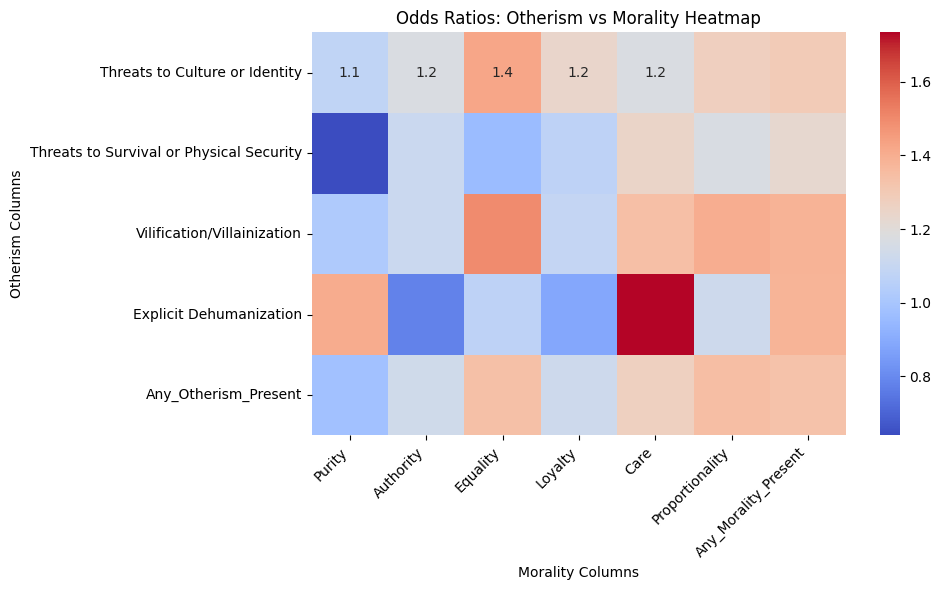

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.contingency_tables import Table2x2

# Define the otherism and morality columns
otherism_columns = ['Threats to Culture or Identity', 'Threats to Survival or Physical Security', 
                    'Vilification/Villainization', 'Explicit Dehumanization', 'Any_Otherism_Present']
morality_columns = ['Purity', 'Authority', 'Equality', 'Loyalty', 'Care', 'Proportionality', 'Any_Morality_Present']

# Initialize an empty DataFrame to store the odds ratios
odds_ratios_matrix = pd.DataFrame(index=otherism_columns, columns=morality_columns)

# Loop through each combination of otherism and morality columns
for otherism in otherism_columns:
    for morality in morality_columns:
        # Create a 2x2 contingency table for each pair of otherism and morality
        table = pd.crosstab(df_filtered[otherism], df_filtered[morality])
        
        # Calculate the odds ratio
        try:
            odds_ratio = Table2x2(table).oddsratio
        except ZeroDivisionError:
            odds_ratio = None  # Handle cases where the table has 0 values
        
        # Store the odds ratio in the matrix
        odds_ratios_matrix.loc[otherism, morality] = odds_ratio

# Convert the matrix to float for plotting
odds_ratios_matrix = odds_ratios_matrix.astype(float)

# Plot the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(odds_ratios_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Odds Ratios: Otherism vs Morality Heatmap")
plt.xlabel("Morality Columns")
plt.ylabel("Otherism Columns")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

# Show the heatmap
plt.show()


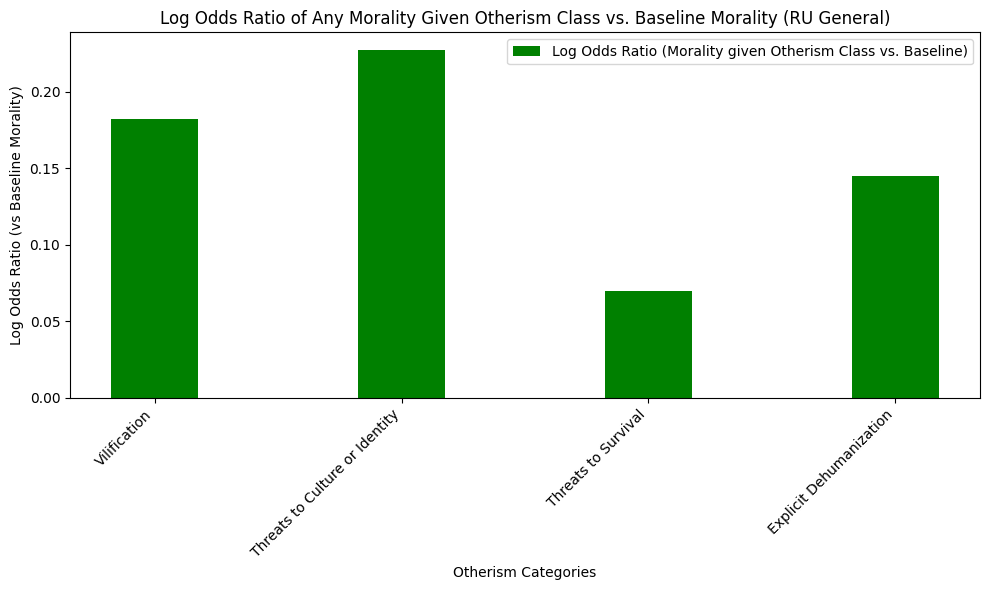

In [43]:
# Data for RU General probabilities
general_data = {
    'Otherism Class': ['Vilification', 'Threats to Culture or Identity', 'Threats to Survival', 'Explicit Dehumanization'],
    'P(Any Morality | Otherism_Class)': [0.4007, 0.4116, 0.3741, 0.3918],
    'P(Any Morality)': 0.35782071253878917  # Baseline probability of morality in RU General context
}

# Compute the log odds for each morality given otherism class vs. baseline morality
log_odds_comparison = [log_odds_ratio(general_data['P(Any Morality | Otherism_Class)'][i], general_data['P(Any Morality)']) 
                       for i in range(len(general_data['Otherism Class']))]

# Plotting the log odds comparison as a bar chart
plt.figure(figsize=(10, 6))
index = np.arange(len(general_data['Otherism Class']))

# Plotting the log odds ratio
plt.bar(index, log_odds_comparison, bar_width, label='Log Odds Ratio (Morality given Otherism Class vs. Baseline)', color='green')

# Labels and titles
plt.xlabel('Otherism Categories')
plt.ylabel('Log Odds Ratio (vs Baseline Morality)')
plt.title('Log Odds Ratio of Any Morality Given Otherism Class vs. Baseline Morality (RU General)')
plt.xticks(index, general_data['Otherism Class'], rotation=45, ha="right")
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [29]:
import pandas as pd
import numpy as np

# Create a contingency table for 'Any_Otherism_Present' vs. 'Any_Morality_Present'
contingency_table = pd.crosstab(df_filtered['Any_Otherism_Present'], df_filtered['Any_Morality_Present'])

# Extract counts from the contingency table
# The table should look something like this:
# Any_Morality_Present      0     1
# Any_Otherism_Present      
# 0                       count  count
# 1                       count  count

# Counts for otherism present
n_with_otherism_and_morality = contingency_table.loc[1, 1]  # Otherism present, morality present
n_with_otherism_no_morality = contingency_table.loc[1, 0]   # Otherism present, no morality

# Counts for otherism absent
n_without_otherism_and_morality = contingency_table.loc[0, 1]  # Otherism absent, morality present
n_without_otherism_no_morality = contingency_table.loc[0, 0]   # Otherism absent, no morality

# Calculate odds for messages WITH otherism
odds_with_otherism = (n_with_otherism_and_morality / n_with_otherism_no_morality)

# Calculate odds for messages WITHOUT otherism
odds_without_otherism = (n_without_otherism_and_morality / n_without_otherism_no_morality)

# Calculate the log odds ratio
log_odds_ratio = np.log(odds_with_otherism / odds_without_otherism)

# Print the result
log_odds_ratio

0.17875934258431145

In [ ]:
cramers_v_results = calculate_cramers_v(df_binary_uk, otherism_col, morality_columns)

cramers_v_results

In [9]:
import pandas as pd

def analyze_otherism(df, otherism_columns, min_date=None, max_date=None):
    """
    Analyzes the probabilities of otherism in the data, including the probability
    of using any otherism device, the probability of using each otherism class,
    and the conditional probabilities of each otherism class given any otherism.

    Parameters:
    - df: DataFrame containing the data to analyze.
    - otherism_columns: List of columns corresponding to otherism categories.
    - min_date: Minimum date for filtering the DataFrame (optional).
    - max_date: Maximum date for filtering the DataFrame (optional).

    Returns:
    - Dictionary with overall results and probabilities for each otherism class.
    """

    # Convert date column to datetime if filtering by date
    if min_date or max_date:
        df['date'] = pd.to_datetime(df['date'])
        if min_date:
            df = df[df['date'] >= min_date]
        if max_date:
            df = df[df['date'] <= max_date]

    # Create a binary column for "Any Otherism"
    df['Any_Otherism_Present'] = df[otherism_columns].max(axis=1)
    
    # Convert to binary (0 or 1)
    df['Any_Otherism_Present'] = df['Any_Otherism_Present'].apply(lambda x: 1 if x > 0 else 0)

    # Calculate overall probabilities
    total_messages = len(df)
    total_otherism = df['Any_Otherism_Present'].sum()

    prob_otherism = total_otherism / total_messages

    # Initialize a dictionary to hold probabilities for each otherism class
    otherism_probs = {}
    otherism_given_probs = {}

    for column in otherism_columns:
        # Calculate P(Otherism_Class)
        total_specific_otherism = df[column].sum()
        prob_specific_otherism = total_specific_otherism / total_messages

        # Calculate P(Otherism_Class | Otherism)
        prob_specific_otherism_given_any_otherism = total_specific_otherism / total_otherism if total_otherism > 0 else 0

        otherism_probs[column] = prob_specific_otherism
        otherism_given_probs[column] = prob_specific_otherism_given_any_otherism

    # Sort otherism classes by their probabilities
    sorted_otherism_probs = sorted(otherism_probs.items(), key=lambda x: x[1], reverse=True)
    sorted_otherism_given_probs = sorted(otherism_given_probs.items(), key=lambda x: x[1], reverse=True)

    results = {
        "Total Messages": total_messages,
        "Total Otherism Messages": total_otherism,
        "P(Otherism)": prob_otherism,
        "Otherism Class Probabilities": sorted_otherism_probs,
        "P(Otherism_Class | Otherism)": sorted_otherism_given_probs
    }

    return results

# Example usage:
otherism_columns = [
    'Threats to Culture or Identity',
    'Threats to Survival or Physical Security',
    'Vilification/Villainization',
    'Explicit Dehumanization'
]

results = analyze_otherism(
    df_binary_uk,
    otherism_columns,
    min_date='2022-02-23',
    max_date='2023-12-19'
)

print("Overall Results UK GENERAL:")
print(f"Total Messages: {results['Total Messages']}")
print(f"P(Otherism): {results['P(Otherism)']}")
print("\nOtherism Class Probabilities:")
for otherism, prob in results['Otherism Class Probabilities']:
    print(f"{otherism}: P(Otherism_Class) = {prob:.4f}")

print("\nConditional Probabilities Given Otherism:")
for otherism, prob in results['P(Otherism_Class | Otherism)']:
    print(f"{otherism}: P({otherism} | Otherism) = {prob:.4f}")

results = analyze_otherism(
    df_binary_uk,
    otherism_columns,
    min_date='2022-02-23',
    max_date='2022-04-19'
)

print("Overall Results UK INFLAMED:")
print(f"Total Messages: {results['Total Messages']}")
print(f"P(Otherism): {results['P(Otherism)']}")
print("\nOtherism Class Probabilities:")
for otherism, prob in results['Otherism Class Probabilities']:
    print(f"{otherism}: P(Otherism_Class) = {prob:.4f}")

print("\nConditional Probabilities Given Otherism:")
for otherism, prob in results['P(Otherism_Class | Otherism)']:
    print(f"{otherism}: P({otherism} | Otherism) = {prob:.4f}")
    
results = analyze_otherism(
    df_binary_ru,
    otherism_columns,
    min_date='2022-02-23',
    max_date='2023-12-19'
)

print("Overall Results RU GENERAL:")
print(f"Total Messages: {results['Total Messages']}")
print(f"P(Otherism): {results['P(Otherism)']}")
print("\nOtherism Class Probabilities:")
for otherism, prob in results['Otherism Class Probabilities']:
    print(f"{otherism}: P(Otherism_Class) = {prob:.4f}")

print("\nConditional Probabilities Given Otherism:")
for otherism, prob in results['P(Otherism_Class | Otherism)']:
    print(f"{otherism}: P({otherism} | Otherism) = {prob:.4f}")
    
results = analyze_otherism(
    df_binary_ru,
    otherism_columns,
    min_date='2022-02-23',
    max_date='2022-04-19'
)

print("Overall Results RU INFLAMED:")
print(f"Total Messages: {results['Total Messages']}")
print(f"P(Otherism): {results['P(Otherism)']}")
print("\nOtherism Class Probabilities:")
for otherism, prob in results['Otherism Class Probabilities']:
    print(f"{otherism}: P(Otherism_Class) = {prob:.4f}")

print("\nConditional Probabilities Given Otherism:")
for otherism, prob in results['P(Otherism_Class | Otherism)']:
    print(f"{otherism}: P({otherism} | Otherism) = {prob:.4f}")
    

Overall Results UK GENERAL:
Total Messages: 1756219
P(Otherism): 0.20175957554268573

Otherism Class Probabilities:
Threats to Survival or Physical Security: P(Otherism_Class) = 0.0993
Vilification/Villainization: P(Otherism_Class) = 0.0800
Threats to Culture or Identity: P(Otherism_Class) = 0.0433
Explicit Dehumanization: P(Otherism_Class) = 0.0197

Conditional Probabilities Given Otherism:
Threats to Survival or Physical Security: P(Threats to Survival or Physical Security | Otherism) = 0.4920
Vilification/Villainization: P(Vilification/Villainization | Otherism) = 0.3964
Threats to Culture or Identity: P(Threats to Culture or Identity | Otherism) = 0.2147
Explicit Dehumanization: P(Explicit Dehumanization | Otherism) = 0.0977
Overall Results UK INFLAMED:
Total Messages: 396153
P(Otherism): 0.24978480536560368

Otherism Class Probabilities:
Threats to Survival or Physical Security: P(Otherism_Class) = 0.1369
Vilification/Villainization: P(Otherism_Class) = 0.1031
Threats to Culture o

In [25]:
results = analyze_otherism(
    df_binary_ru,
    otherism_columns,
    min_date='2022-03-23',
    max_date='2022-04-19'
)

print("Overall Results RU:")
print(f"Total Messages: {results['Total Messages']}")
print(f"P(Otherism): {results['P(Otherism)']}")
print("\nOtherism Class Probabilities:")
for otherism, prob in results['Otherism Class Probabilities']:
    print(f"{otherism}: P(Otherism_Class) = {prob:.4f}")

print("\nConditional Probabilities Given Otherism:")
for otherism, prob in results['P(Otherism_Class | Otherism)']:
    print(f"{otherism}: P({otherism} | Otherism) = {prob:.4f}")

Overall Results RU:
Total Messages: 210438
P(Otherism): 0.2194613140212319

Otherism Class Probabilities:
Vilification/Villainization: P(Otherism_Class) = 0.1607
Threats to Culture or Identity: P(Otherism_Class) = 0.0644
Threats to Survival or Physical Security: P(Otherism_Class) = 0.0359
Explicit Dehumanization: P(Otherism_Class) = 0.0129

Conditional Probabilities Given Otherism:
Vilification/Villainization: P(Vilification/Villainization | Otherism) = 0.7321
Threats to Culture or Identity: P(Threats to Culture or Identity | Otherism) = 0.2935
Threats to Survival or Physical Security: P(Threats to Survival or Physical Security | Otherism) = 0.1634
Explicit Dehumanization: P(Explicit Dehumanization | Otherism) = 0.0587


In [ ]:
28% jump in morality

## Kruskal-Wallis Test

## Kolmogorov–Smirnov

In [17]:
from scipy.stats import ks_2samp
import numpy as np
import pandas as pd

# Define a function to normalize the number of appearances
def normalize_counts(df, columns):
    """
    Normalize the counts of given columns to a common scale (0-1).
    
    Parameters:
    - df: DataFrame containing the counts to be normalized.
    - columns: List of column names to be normalized.
    
    Returns:
    - df_normalized: DataFrame with normalized columns.
    """
    df_normalized = df.copy()
    for column in columns:
        max_value = df[column].max()
        if max_value != 0:
            df_normalized[column] = df[column] / max_value
    return df_normalized

# Define a function to run the Kolmogorov-Smirnov test for each morality column
def kolmogorov_smirnov_test_each_column(df, otherism_cols, morality_cols):
    """
    Perform Kolmogorov-Smirnov test on each morality trait to compare distributions
    in posts with and without otherism traits.
    
    Parameters:
    - df: DataFrame containing the data.
    - otherism_cols: List of columns representing otherism traits.
    - morality_cols: List of columns representing morality traits.
    
    Returns:
    - test_results: Dictionary with column names as keys and test statistics and p-values as values.
    """
    # Normalize morality columns
    df_normalized = normalize_counts(df, morality_cols)
    
    # Create a binary column indicating presence of any otherism trait
    df['Otherism_Present'] = df[otherism_cols].max(axis=1)
    
    test_results = {}
    
    # Run Kolmogorov-Smirnov test for each morality column
    for col in morality_cols:
        with_otherism = df_normalized[df['Otherism_Present'] == 1][col]
        without_otherism = df_normalized[df['Otherism_Present'] == 0][col]
        
        # Run Kolmogorov-Smirnov test
        stat, p_value = ks_2samp(with_otherism, without_otherism)
        print(f"Kolmogorov-Smirnov Test for {col}:\nStatistic: {stat}, p-value: {p_value}\n")
        
        # Store the result
        test_results[col] = {"statistic": stat, "p_value": p_value}
        
        # Clean up memory
        del with_otherism, without_otherism
    
    # Clean up memory
    del df['Otherism_Present'], df_normalized
    
    return test_results

# Example usage:
# Define the columns
otherism_cols = [
    'Threats to Culture or Identity',
    'Threats to Survival or Physical Security',
    'Vilification/Villainization',
    'Explicit Dehumanization'
]

morality_cols = [
    'Purity',
    'Authority',
    'Equality',
    'Loyalty',
    'Care',
    'Proportionality'
]

# Assuming df_binary is your DataFrame
kolmogorov_smirnov_results = kolmogorov_smirnov_test_each_column(df_binary, otherism_cols, morality_cols)



Kolmogorov-Smirnov Test for Purity:
Statistic: 1.0900641253419607e-05, p-value: 1.0

Kolmogorov-Smirnov Test for Authority:
Statistic: 0.00022403399581993888, p-value: 0.41435020319637184

Kolmogorov-Smirnov Test for Equality:
Statistic: 0.0018952815250866673, p-value: 4.591795232628408e-49

Kolmogorov-Smirnov Test for Loyalty:
Statistic: 0.008980301933024792, p-value: 0.0

Kolmogorov-Smirnov Test for Care:
Statistic: 0.026480949427569733, p-value: 0.0

Kolmogorov-Smirnov Test for Proportionality:
Statistic: 0.004190797885385789, p-value: 3.1045207157172985e-238



In [ ]:
# Get the total memory in GB
total_memory = psutil.virtual_memory().total / (1024 ** 3)

# Get the available memory in GB
available_memory = psutil.virtual_memory().available / (1024 ** 3)

print(f"Total memory: {total_memory:.2f} GB")
print(f"Available memory: {available_memory:.2f} GB")

In [18]:
import sys
sys.path.append('/nas/home/pgerard/miniconda3/envs/vllm/lib/python3.10/site-packages')
import numpy as np
import pandas as pd
from scipy.stats import kruskal

# Function to normalize counts in-place
def normalize_counts(df, columns):
    """
    Normalize the counts of given columns to a common scale (0-1).
    
    Parameters:
    - df: DataFrame containing the counts to be normalized.
    - columns: List of column names to be normalized.
    """
    for column in columns:
        max_value = df[column].max()
        if max_value != 0:
            df[column] = df[column] / max_value

# Function to perform the Kruskal-Wallis test
def kruskal_wallis_with_posthoc(df, otherism_cols, morality_cols):
    # Normalize the morality columns in-place
    normalize_counts(df, morality_cols)
    
    kruskal_results = {}
    
    # Process each morality column individually to save memory
    for col in morality_cols:
        groups = []
        for otherism_col in otherism_cols:
            # Use .copy() to avoid setting values on a slice
            group = df[df[otherism_col] == 1][col].dropna().copy()
            groups.append(group)
        
        # Run Kruskal-Wallis test
        stat, p_value = kruskal(*groups)
        kruskal_results[col] = {"statistic": stat, "p_value": p_value}
        print(f"Kruskal-Wallis Test for {col}:\nStatistic: {stat}, p-value: {p_value}\n")
        
        # Clean up memory by deleting the groups
        del groups
    
    return kruskal_results

# Define the columns
otherism_cols = [
    'Threats to Culture or Identity',
    'Threats to Survival or Physical Security',
    'Vilification/Villainization',
    'Explicit Dehumanization'
]

morality_cols = [
    'Purity',
    'Authority',
    'Equality',
    'Loyalty',
    'Care',
    'Proportionality'
]

# Assuming df_binary is your DataFrame
kruskal_results = kruskal_wallis_with_posthoc(df_binary, otherism_cols, morality_cols)

Kruskal-Wallis Test for Purity:
Statistic: 141.9564440775528, p-value: 1.430853307201716e-30

Kruskal-Wallis Test for Authority:
Statistic: 20936.96739159621, p-value: 0.0

Kruskal-Wallis Test for Equality:
Statistic: 17998.493930356504, p-value: 0.0

Kruskal-Wallis Test for Loyalty:
Statistic: 301.94455439040496, p-value: 3.774922181727812e-65

Kruskal-Wallis Test for Care:
Statistic: 42964.28643334504, p-value: 0.0

Kruskal-Wallis Test for Proportionality:
Statistic: 13758.702454095439, p-value: 0.0



In [19]:
import sys
sys.path.append('/nas/home/pgerard/miniconda3/envs/vllm/lib/python3.10/site-packages')
import numpy as np
import pandas as pd
from scipy.stats import kruskal

# Function to perform Kruskal-Wallis test for each otherism category
def kruskal_wallis_otherism_vs_moral_language(df, otherism_cols, morality_cols):
    # Create a binary column indicating if any moral language is present
    df['Any_Moral_Language'] = df[morality_cols].max(axis=1)
    
    kruskal_results = {}
    
    # Perform Kruskal-Wallis test for each otherism category
    for col in otherism_cols:
        # Use .copy() to avoid setting values on a slice
        group1 = df.loc[df[col] == 1, 'Any_Moral_Language'].dropna().copy()
        group2 = df.loc[df[col] == 0, 'Any_Moral_Language'].dropna().copy()
        
        # Run Kruskal-Wallis test
        stat, p_value = kruskal(group1, group2)
        kruskal_results[col] = {"statistic": stat, "p_value": p_value}
        print(f"Kruskal-Wallis Test for {col} vs Moral Language:\nStatistic: {stat}, p-value: {p_value}\n")
        
        # Clean up memory by deleting the groups
        del group1, group2
    
    # Clean up memory by deleting the temporary column
    del df['Any_Moral_Language']
    
    return kruskal_results

# Define the columns
otherism_cols = [
    'Threats to Culture or Identity',
    'Threats to Survival or Physical Security',
    'Vilification/Villainization',
    'Explicit Dehumanization'
]

morality_cols = [
    'Purity',
    'Authority',
    'Equality',
    'Loyalty',
    'Care',
    'Proportionality'
]

# Assuming df_binary is your DataFrame
kruskal_results = kruskal_wallis_otherism_vs_moral_language(df_binary, otherism_cols, morality_cols)

# Clean up memory after the results are obtained
# del df_binary

Kruskal-Wallis Test for Threats to Culture or Identity vs Moral Language:
Statistic: 21293.534446854366, p-value: 0.0

Kruskal-Wallis Test for Threats to Survival or Physical Security vs Moral Language:
Statistic: 34345.50038620708, p-value: 0.0

Kruskal-Wallis Test for Vilification/Villainization vs Moral Language:
Statistic: 97267.82597111366, p-value: 0.0

Kruskal-Wallis Test for Explicit Dehumanization vs Moral Language:
Statistic: 2935.5288829474007, p-value: 0.0



In [33]:
# Filter the DataFrame to find rows containing "@"
rows_with_at = df_binary[df_binary['cleaned_description'].str.contains('', na=False)]

# Display the filtered DataFrame
rows_with_at['cleaned_description'].iloc[3]


'По сообщению пресс-службы НАТО  19 марта 2021 года в штаб-квартире альянса состоялась первая в истории внутренняя конференция, посвященная перспективам ЛГБТ Q+. Это было онлайн-мероприятие, организованное группой волонтеров «Proud @ NATO» под руководством сотрудников, оно собрало около 130 участников из гражданского и военного персонала, а также национальных делегаций, чтобы обсудить опыт и проблемы ЛГБТ Q+ прямо на работе.Генеральный секретарь Йенс Столтенберг обратился к участникам конференции с заявлением о важности инклюзивного лидерства, заявив, что «каждый член сообщества ЛГБТ Q+ в НАТО является ценным членом нашего персонала и семьи, потому что разнообразие и вовлеченность лежат в основе того, кто мы есть и что мы делаем. ... использование всех ресурсов и опыта делает нас сильнее и лучше подготовленными к тому, чтобы смотреть в будущее. Генеральный секретарь также расширил концепцию «союзничества» на рабочем месте, определив союзников как «людей, которые не идентифицируют себя 

In [35]:
df_binary.columns

Index(['user', 'post_id', 'url', 'title', 'image_url', 'description', 'views',
       'date', 'channel_name', 'channel_label', 'cleaned_description',
       'cleaned_sentences', 'classifications', 'explanation',
       'Threats to Culture or Identity',
       'Threats to Survival or Physical Security',
       'Vilification/Villainization', 'Explicit Dehumanization', 'None',
       'Non-Moral', 'Purity', 'Thin Morality', 'Authority', 'Equality',
       'Loyalty', 'Care', 'Proportionality', 'Any_Otherism_Group',
       'Any_Morality_Group', 'otherism', 'morality', 'Any_Otherism_Present',
       'Any_Morality_Present', 'Otherism_Present', 'Any_Moral_Language'],
      dtype='object')

In [36]:
import re

# Function to extract domains from a string
def extract_domains(text):
    # Regular expression to find domains
    domain_pattern = r'(?:https?://)?(?:www\.)?([a-zA-Z0-9.-]+\.[a-zA-Z]{2,})'
    return re.findall(domain_pattern, text)

# Apply the function to the cleaned_description column and flatten the list of lists
all_domains = df_binary['cleaned_description'].dropna().apply(extract_domains).sum()

# Get unique domains
unique_domains = set(all_domains)

# Display the unique domains
unique_domains


{'-29.RTV',
 '-8.t.me',
 '-80.t.me',
 '....me',
 '...Apple',
 '...Bayadera',
 '...CNN',
 '...Extra',
 '...Reuters',
 '...UPD',
 '...You',
 '...YouTube',
 '...t.me',
 '.T.me',
 '.Thegatewaypundit.com',
 '.ns.com',
 '.pdf.lnk',
 '.psychotherapy.ruerichevalex.com',
 '.rk.gov.ru',
 '.spzh.news',
 '.t.me',
 '.web.telegram.org',
 '1.RU',
 '10.03.23.ps',
 '10.Whalen',
 '10t.me',
 '11.00-18.00.office.timepad.ru',
 '112.by',
 '161.RU',
 '2.t.me',
 '20.00.CASA',
 '2019.xlsx',
 '2021.ru',
 '2024.Guardian',
 '2030.mos.ru',
 '24.kg',
 '249130peremishlsky.klg.ru',
 '576-80-06kkult.spb.ru',
 '600.Defence',
 '66.ru',
 'AXA.AXA',
 'Ad26.COV',
 'Agetheage.com.au',
 'Arbat.media',
 'Beryslavt.me',
 'Bildbild.de',
 'Blackstone.BlackRock',
 'Blitz.plus',
 'COVID-19t.me',
 'Chadayev.ru',
 'Change.org',
 'Chroniclechron.com',
 'Citizengo.org',
 'Coronavirus.Kz',
 'DFO.INFO',
 'DORIAN.RU',
 'Dailyce.cn',
 'Dailychinadaily.com.cn',
 'Dailypeople.com.cn',
 'Delfi.lt',
 'E.ON',
 'E.On',
 'E1.RU',
 'E1.ru',
 'ER.

In [46]:
# Filter the DataFrame to find rows containing "t.me"
rows_with_t_me = df_binary[df_binary['cleaned_description'].str.contains('t.me', na=False)]

# Display the filtered DataFrame
rows_with_t_me['cleaned_description'].iloc[3]


test_text = rows_with_t_me['cleaned_description'].iloc[3]  # Replace with any row
extracted_channels = extract_telegram_channels(test_text)
print(extracted_channels)

['RVvoenkor']


## Network

In [4]:
import re
import pandas as pd
import networkx as nx
from collections import defaultdict
from tqdm import tqdm

# Enable the progress_apply functionality
tqdm.pandas()

def extract_telegram_channels(text):
    """
    Extract Telegram channel mentions from a text string.
    """
    if isinstance(text, str):  # Check if the input is a string
        # Regular expression to extract channel names after "t.me/"
        channel_pattern = r't\.me/([a-zA-Z0-9_]+)'
        return re.findall(channel_pattern, text)
    else:
        return []  # Return an empty list if the input is not a string

def extract_mentions(df, description_column, start_date, end_date):
    """
    Extract mentioned Telegram channels and save them in the DataFrame.
    
    :param df: DataFrame containing the data
    :param description_column: The column name containing the cleaned descriptions
    :param start_date: Start date to filter the DataFrame
    :param end_date: End date to filter the DataFrame
    :return: A DataFrame with an additional 'mentioned_channels' column
    """
    # Convert 'date' column to datetime if it's not already
    df['date'] = pd.to_datetime(df['date'])

    # Filter the DataFrame based on the specified date range
    df_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

    # Extract all mentioned channels with progress tracking
    df_filtered['mentioned_channels'] = df_filtered[description_column].progress_apply(extract_telegram_channels)
    
    return df_filtered

def create_weighted_network(df_filtered, channel_name_column):
    """
    Create a weighted network of Telegram channels based on mentions.
    
    :param df_filtered: DataFrame containing the data and extracted mentions
    :param channel_name_column: The column name containing the channel names
    :return: A weighted network (graph) of Telegram channels
    """
    # Initialize a dictionary to count mentions
    mention_counts = defaultdict(int)
    
    for _, row in tqdm(df_filtered.iterrows(), total=df_filtered.shape[0], desc="Processing Rows"):
        source_channel = row[channel_name_column]
        mentioned_channels = row['mentioned_channels']

        for target_channel in mentioned_channels:
            if source_channel != target_channel:  # Avoid self-loops
                mention_counts[(source_channel, target_channel)] += 1

    # Create a weighted graph from the mention counts
    G = nx.DiGraph()
    
    for (source, target), weight in mention_counts.items():
        G.add_edge(source, target, weight=weight)
    
    return G

# Example usage:
start_date = '2020-10-10'  # Replace with your actual start date
end_date = '2023-12-11'    # Replace with your actual end date
channel_name_column = 'channel_name'
description_column = 'cleaned_description'

# Step 1: Extract mentioned channels and save them
df_filtered = extract_mentions(merged_df, description_column, start_date, end_date)
output_tsv = '/nas/eclairnas01/users/pgerard/df_ru_with_mentions/extracted_mentions.tsv'  # Path where the TSV file will be saved
df_filtered.to_csv(output_tsv, sep='\t', index=False)

100%|██████████| 209385272/209385272 [05:13<00:00, 666913.32it/s]
/tmp/ipykernel_4066241/3651971526.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['mentioned_channels'] = df_filtered[description_column].progress_apply(extract_telegram_channels)


In [1]:
df_filtered_non_empty = df_filtered[df_filtered['mentioned_channels'].str.len() > 0]

# Select only the 'channel_name' and 'mentioned_channels' columns
df_to_save = df_filtered_non_empty[['channel_name', 'mentioned_channels']]

# Save the filtered DataFrame to a TSV file
output_tsv = '/nas/eclairnas01/users/pgerard/df_ru_with_mentions/extracted_mentions_containing.tsv'  # Path


NameError: name 'df_filtered' is not defined

In [5]:
import psutil

# Get the total memory in GB
total_memory = psutil.virtual_memory().total / (1024 ** 3)

# Get the available memory in GB
available_memory = psutil.virtual_memory().available / (1024 ** 3)

print(f"Total memory: {total_memory:.2f} GB")
print(f"Available memory: {available_memory:.2f} GB")

Total memory: 251.55 GB
Available memory: 112.10 GB


In [ ]:
# Step 2: Create the weighted network using the extracted mentions
network_graph = create_weighted_network(df_filtered, channel_name_column)

# To view the edges with weights
network_edges = list(network_graph.edges(data=True))

network_edges

In [54]:
unique_channel_names = df_binary['channel_name'].unique()

# Display the unique channel names
unique_channel_names

array(['ontnews', 'sorok40russia', 'nemalahov', 'infantmilitario',
       'ZOVcrimea', 'konkretnost', 'banksta', 'SolovievLive',
       'krasniydom', 'MamchatKharkovskaya'], dtype=object)

In [52]:
len(network_edges)

54

In [3]:
import pandas as pd
import numpy as np

def analyze_otherism_and_morality(df, otherism_columns, morality_columns, min_date=None, max_date=None):
    """
    Analyzes the probabilities of morality given otherism in the data, including the probability
    of using any morality device, the probability of using each otherism class, and the conditional 
    probabilities of any morality given specific otherism classes, along with the standard error.

    Parameters:
    - df: DataFrame containing the data to analyze.
    - otherism_columns: List of columns corresponding to otherism categories.
    - morality_columns: List of columns corresponding to morality categories.
    - min_date: Minimum date for filtering the DataFrame (optional).
    - max_date: Maximum date for filtering the DataFrame (optional).

    Returns:
    - Dictionary with overall results, probabilities for each otherism class, and standard errors.
    """

    # Convert date column to datetime if filtering by date
    if min_date or max_date:
        df['date'] = pd.to_datetime(df['date'])
        if min_date:
            df = df[df['date'] >= min_date]
        if max_date:
            df = df[df['date'] <= max_date]

    # Create a binary column for "Any Otherism" and "Any Morality"
    df['Any_Otherism_Present'] = df[otherism_columns].max(axis=1)
    df['Any_Morality_Present'] = df[morality_columns].max(axis=1)

    # Convert to binary (0 or 1)
    df['Any_Otherism_Present'] = df['Any_Otherism_Present'].apply(lambda x: 1 if x > 0 else 0)
    df['Any_Morality_Present'] = df['Any_Morality_Present'].apply(lambda x: 1 if x > 0 else 0)

    # Calculate overall probabilities
    total_messages = len(df)
    total_morality = df['Any_Morality_Present'].sum()
    total_otherism = df['Any_Otherism_Present'].sum()

    prob_morality = total_morality / total_messages

    # Initialize a dictionary to hold probabilities for each otherism class
    otherism_probs = {}
    otherism_morality_probs = {}
    otherism_morality_se = {}

    for column in otherism_columns:
        # Calculate P(Otherism_Class)
        total_specific_otherism = df[column].sum()
        prob_specific_otherism = total_specific_otherism / total_messages

        # Calculate P(Any Morality | Otherism_Class)
        morality_given_specific_otherism = df[df[column] == 1]['Any_Morality_Present'].sum()
        prob_morality_given_specific_otherism = (morality_given_specific_otherism / 
                                                 total_specific_otherism if total_specific_otherism > 0 else 0)
        
        # Calculate the standard error for the conditional probability
        if total_specific_otherism > 0:
            se_morality_given_specific_otherism = np.sqrt((prob_morality_given_specific_otherism * 
                                                           (1 - prob_morality_given_specific_otherism)) / 
                                                          total_specific_otherism)
        else:
            se_morality_given_specific_otherism = 0
        
        # Store probabilities and standard errors
        otherism_probs[column] = prob_specific_otherism
        otherism_morality_probs[column] = prob_morality_given_specific_otherism
        otherism_morality_se[column] = se_morality_given_specific_otherism

    # Sort otherism classes by their probabilities
    sorted_otherism_probs = sorted(otherism_probs.items(), key=lambda x: x[1], reverse=True)
    sorted_otherism_morality_probs = sorted(otherism_morality_probs.items(), key=lambda x: x[1], reverse=True)
    sorted_otherism_morality_se = sorted(otherism_morality_se.items(), key=lambda x: x[1], reverse=True)

    results = {
        "Total Messages": total_messages,
        "Total Morality Messages": total_morality,
        "Total Otherism Messages": total_otherism,
        "P(Morality)": prob_morality,
        "Otherism Class Probabilities": sorted_otherism_probs,
        "P(Any Morality | Otherism_Class)": sorted_otherism_morality_probs,
        "Standard Error (P(Any Morality | Otherism_Class))": sorted_otherism_morality_se
    }

    return results

# Example usage:
otherism_columns = [
    'Threats to Culture or Identity',
    'Threats to Survival or Physical Security',
    'Vilification/Villainization',
    'Explicit Dehumanization'
]

morality_columns = [
    'Purity',
    'Authority',
    'Equality',
    'Loyalty',
    'Care',
    'Proportionality'
]

# Assuming df_binary_uk and df_binary_ru are your dataframes for UK and Russian datasets.

results_ru_general = analyze_otherism_and_morality(
    df_binary_ru,
    otherism_columns,
    morality_columns,
    min_date='2022-02-23',
    max_date='2023-12-19'
)

print("Overall Results RU GENERAL:")
print(f"Total Messages: {results_ru_general['Total Messages']}")
print(f"P(Any Morality): {results_ru_general['P(Morality)']}")
print("\nOtherism Class Probabilities:")
for otherism, prob in results_ru_general['Otherism Class Probabilities']:
    print(f"{otherism}: P(Otherism_Class) = {prob:.4f}")

print("\nConditional Probabilities Given Specific Otherism:")
for otherism, prob in results_ru_general['P(Any Morality | Otherism_Class)']:
    print(f"{otherism}: P(Any Morality | {otherism}) = {prob:.4f}")

print("\nStandard Errors for Conditional Probabilities:")
for otherism, se in results_ru_general['Standard Error (P(Any Morality | Otherism_Class))']:
    print(f"{otherism}: SE(P(Any Morality | {otherism})) = {se:.4f}")

Overall Results RU GENERAL:
Total Messages: 40086985
P(Any Morality): 0.3175389967591726

Otherism Class Probabilities:
Vilification/Villainization: P(Otherism_Class) = 0.1502
Threats to Culture or Identity: P(Otherism_Class) = 0.1087
Threats to Survival or Physical Security: P(Otherism_Class) = 0.1024
Explicit Dehumanization: P(Otherism_Class) = 0.0220

Conditional Probabilities Given Specific Otherism:
Vilification/Villainization: P(Any Morality | Vilification/Villainization) = 0.3596
Threats to Culture or Identity: P(Any Morality | Threats to Culture or Identity) = 0.3572
Explicit Dehumanization: P(Any Morality | Explicit Dehumanization) = 0.3548
Threats to Survival or Physical Security: P(Any Morality | Threats to Survival or Physical Security) = 0.3375

Standard Errors for Conditional Probabilities:
Explicit Dehumanization: SE(P(Any Morality | Explicit Dehumanization)) = 0.0005
Threats to Survival or Physical Security: SE(P(Any Morality | Threats to Survival or Physical Security))

In [4]:
results_uk_general = analyze_otherism_and_morality(
    df_binary_uk,
    otherism_columns,
    morality_columns,
    min_date='2022-02-23',
    max_date='2023-12-19'
)

print("Overall Results UK GENERAL:")
print(f"Total Messages: {results_ru_general['Total Messages']}")
print(f"P(Any Morality): {results_ru_general['P(Morality)']}")
print("\nOtherism Class Probabilities:")
for otherism, prob in results_ru_general['Otherism Class Probabilities']:
    print(f"{otherism}: P(Otherism_Class) = {prob:.4f}")

print("\nConditional Probabilities Given Specific Otherism:")
for otherism, prob in results_ru_general['P(Any Morality | Otherism_Class)']:
    print(f"{otherism}: P(Any Morality | {otherism}) = {prob:.4f}")

print("\nStandard Errors for Conditional Probabilities:")
for otherism, se in results_ru_general['Standard Error (P(Any Morality | Otherism_Class))']:
    print(f"{otherism}: SE(P(Any Morality | {otherism})) = {se:.4f}")



Overall Results UK GENERAL:
Total Messages: 18721761
P(Any Morality): 0.30845981849677495

Otherism Class Probabilities:
Threats to Survival or Physical Security: P(Otherism_Class) = 0.2040
Vilification/Villainization: P(Otherism_Class) = 0.1150
Threats to Culture or Identity: P(Otherism_Class) = 0.0681
Explicit Dehumanization: P(Otherism_Class) = 0.0396

Conditional Probabilities Given Specific Otherism:
Vilification/Villainization: P(Any Morality | Vilification/Villainization) = 0.3500
Threats to Culture or Identity: P(Any Morality | Threats to Culture or Identity) = 0.3415
Threats to Survival or Physical Security: P(Any Morality | Threats to Survival or Physical Security) = 0.3356
Explicit Dehumanization: P(Any Morality | Explicit Dehumanization) = 0.3203

Standard Errors for Conditional Probabilities:
Explicit Dehumanization: SE(P(Any Morality | Explicit Dehumanization)) = 0.0005
Threats to Culture or Identity: SE(P(Any Morality | Threats to Culture or Identity)) = 0.0004
Vilificat

In [6]:
from scipy.stats import norm
import numpy as np
results_ru_general = analyze_otherism_and_morality(
    df_binary_ru,
    otherism_columns,
    morality_columns,
    min_date='2022-02-23',
    max_date='2023-12-19'
)
results_uk_general = analyze_otherism_and_morality(
    df_binary_uk,
    otherism_columns,
    morality_columns,
    min_date='2022-02-23',
    max_date='2023-12-19'
)


def two_proportion_z_test(p1, n1, p2, n2):
    """
    Perform a two-proportion Z-test to compare proportions.

    Parameters:
    - p1: Proportion 1 (e.g., P(Any Morality | Otherism Class) in RU)
    - n1: Total sample size 1 (e.g., total number of messages with the otherism class in RU)
    - p2: Proportion 2 (e.g., P(Any Morality | Otherism Class) in UK)
    - n2: Total sample size 2 (e.g., total number of messages with the otherism class in UK)

    Returns:
    - Z: Z-statistic for the test
    - p-value: p-value for the test
    """
    # Pooled proportion
    p_pool = (p1 * n1 + p2 * n2) / (n1 + n2)
    
    # Standard error of the difference in proportions
    se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))
    
    # Z-statistic
    z_stat = (p1 - p2) / se
    
    # p-value (two-tailed test)
    p_value = 2 * (1 - norm.cdf(np.abs(z_stat)))
    
    return z_stat, p_value

def compare_otherism_morality(df_ru, df_uk, otherism_columns):
    """
    Compare the morality given otherism between RU and UK using the two-proportion Z-test.

    Parameters:
    - df_ru: DataFrame for RU results
    - df_uk: DataFrame for UK results
    - otherism_columns: List of otherism columns to compare

    Returns:
    - Dictionary with Z-statistics and p-values for each otherism class
    """
    results = {}

    for column in otherism_columns:
        # Extract conditional probabilities and total counts for RU
        p_ru = df_ru['P(Any Morality | Otherism_Class)'].get(column, 0)
        n_ru = df_ru['Otherism Class Probabilities'].get(column, 0) * df_ru['Total Messages']

        # Extract conditional probabilities and total counts for UK
        p_uk = df_uk['P(Any Morality | Otherism_Class)'].get(column, 0)
        n_uk = df_uk['Otherism Class Probabilities'].get(column, 0) * df_uk['Total Messages']

        # Perform two-proportion Z-test
        z_stat, p_value = two_proportion_z_test(p_ru, n_ru, p_uk, n_uk)

        # Store the result
        results[column] = {'Z-statistic': z_stat, 'p-value': p_value}

    return results

# Example usage:
otherism_columns = [
    'Threats to Culture or Identity',
    'Threats to Survival or Physical Security',
    'Vilification/Villainization',
    'Explicit Dehumanization'
]

# Assuming df_ru and df_uk are dictionaries with the results of RU and UK from the `analyze_otherism_and_morality` function
test_results = compare_otherism_morality(results_ru_general, results_uk_general, otherism_columns)

# Display the test results
for otherism, result in test_results.items():
    print(f"{otherism}: Z-statistic = {result['Z-statistic']:.4f}, p-value = {result['p-value']:.4f}")


AttributeError: 'list' object has no attribute 'get'

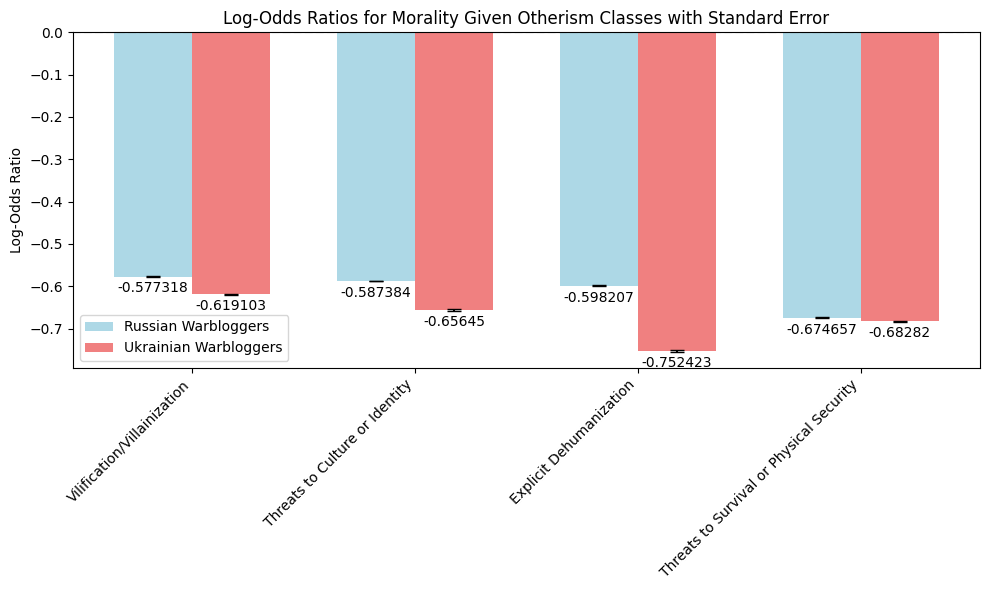

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_log_odds_with_error_bars(results_ru, results_uk):
    """
    Plots a grouped bar chart comparing log-odds ratios of morality given otherism classes
    for Russian and Ukrainian warbloggers, with standard error (stderr) displayed as error bars.
    
    Parameters:
    - results_ru: Results from analyze_otherism_and_morality for RU data.
    - results_uk: Results from analyze_otherism_and_morality for UK data.
    """

    # Extract conditional probabilities and standard errors from both results
    ru_probs = dict(results_ru["P(Any Morality | Otherism_Class)"])
    uk_probs = dict(results_uk["P(Any Morality | Otherism_Class)"])
    ru_se = dict(results_ru["Standard Error (P(Any Morality | Otherism_Class))"])
    uk_se = dict(results_uk["Standard Error (P(Any Morality | Otherism_Class))"])

    # Calculate log-odds ratios and their standard errors for each class
    log_odds_ratios_ru = []
    log_odds_ratios_uk = []
    log_odds_se_ru = []
    log_odds_se_uk = []
    classes = []
    
    for otherism_class in ru_probs:
        if otherism_class in uk_probs:
            ru_prob = ru_probs[otherism_class]
            uk_prob = uk_probs[otherism_class]
            if ru_prob > 0 and uk_prob > 0:
                # Log-odds ratios
                log_odds_ratio_ru = np.log(ru_prob / (1 - ru_prob))
                log_odds_ratio_uk = np.log(uk_prob / (1 - uk_prob))
                
                # Standard error of log-odds ratios
                se_ru = ru_se[otherism_class] / (ru_prob * (1 - ru_prob))
                se_uk = uk_se[otherism_class] / (uk_prob * (1 - uk_prob))
                
                log_odds_ratios_ru.append(log_odds_ratio_ru)
                log_odds_ratios_uk.append(log_odds_ratio_uk)
                log_odds_se_ru.append(se_ru)
                log_odds_se_uk.append(se_uk)
                classes.append(otherism_class)

    # Convert lists to numpy arrays for easier manipulation
    log_odds_ratios_ru = np.array(log_odds_ratios_ru)
    log_odds_ratios_uk = np.array(log_odds_ratios_uk)
    log_odds_se_ru = np.array(log_odds_se_ru)
    log_odds_se_uk = np.array(log_odds_se_uk)

    # Create a grouped bar chart
    x = np.arange(len(classes))  # Label locations
    width = 0.35  # Width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plotting the bars side by side with error bars
    rects1 = ax.bar(x - width/2, log_odds_ratios_ru, width, label='Russian Warbloggers', color='lightblue', yerr=log_odds_se_ru, capsize=5)
    rects2 = ax.bar(x + width/2, log_odds_ratios_uk, width, label='Ukrainian Warbloggers', color='lightcoral', yerr=log_odds_se_uk, capsize=5)

    # Adding labels and title
    ax.set_ylabel('Log-Odds Ratio')
    ax.set_title('Log-Odds Ratios for Morality Given Otherism Classes with Standard Error')
    ax.set_xticks(x)
    ax.set_xticklabels(classes, rotation=45, ha='right')
    ax.axhline(y=0, color='gray', linestyle='--')  # Reference line at 0
    ax.legend()

    # Add value labels on top of the bars
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()
    plt.show()

# Example usage:
# Assuming you have already run the analyze_otherism_and_morality function and have results for RU and UK
# results_ru_general = analyze_otherism_and_morality(df_ru, otherism_columns, morality_columns)
# results_uk_general = analyze_otherism_and_morality(df_uk, otherism_columns, morality_columns)

# Call the function with your actual result structures
plot_log_odds_with_error_bars(results_ru_general, results_uk_general)


In [37]:
import pandas as pd
import numpy as np

def analyze_otherism_and_morality_log_odds_each(df, otherism_columns, morality_columns, min_date=None, max_date=None):
    """
    Analyzes the log-odds ratio of morality for each otherism device, comparing the probability of 
    morality given the presence or absence of each otherism device.
    
    Parameters:
    - df: DataFrame containing the data to analyze.
    - otherism_columns: List of columns corresponding to otherism categories.
    - morality_columns: List of columns corresponding to morality categories.
    - min_date: Minimum date for filtering the DataFrame (optional).
    - max_date: Maximum date for filtering the DataFrame (optional).

    Returns:
    - Dictionary with log-odds ratios for each otherism device.
    """

    # Convert date column to datetime if filtering by date
    if min_date or max_date:
        df['date'] = pd.to_datetime(df['date'])
        if min_date:
            df = df[df['date'] >= min_date]
        if max_date:
            df = df[df['date'] <= max_date]

    # Create a binary column for "Any Morality"
    df['Any_Morality_Present'] = df[morality_columns].max(axis=1)
    df['Any_Morality_Present'] = df['Any_Morality_Present'].apply(lambda x: 1 if x > 0 else 0)

    # Initialize a dictionary to store results for each otherism class
    log_odds_results = {}

    # Iterate over each otherism class
    for column in otherism_columns:
        # Messages with the specific otherism
        messages_with_otherism = df[df[column] == 1]
        # Messages without the specific otherism
        messages_without_otherism = df[df[column] == 0]

        # Calculate P(Morality | Otherism) and P(Morality | No Otherism)
        prob_morality_given_otherism = messages_with_otherism['Any_Morality_Present'].mean()
        prob_morality_given_no_otherism = messages_without_otherism['Any_Morality_Present'].mean()

        # Calculate log-odds ratio if the probabilities are valid
        if prob_morality_given_otherism > 0 and prob_morality_given_no_otherism > 0:
            log_odds_ratio = np.log(
                (prob_morality_given_otherism / (1 - prob_morality_given_otherism)) /
                (prob_morality_given_no_otherism / (1 - prob_morality_given_no_otherism))
            )
        else:
            log_odds_ratio = None  # Cannot calculate log-odds if probabilities are zero

        # Store the results for the specific otherism class
        log_odds_results[column] = {
            "P(Morality | Otherism)": prob_morality_given_otherism,
            "P(Morality | No Otherism)": prob_morality_given_no_otherism,
            "Log-Odds Ratio": log_odds_ratio
        }

    return log_odds_results
# Assuming you have a DataFrame `df` and the list of otherism and morality columns
log_odds_results = analyze_otherism_and_morality_log_odds_each(df_binary_ru, otherism_columns, morality_columns)

# Print the log-odds ratios for each otherism device
for otherism_class, result in log_odds_results.items():
    print(f"{otherism_class}:")
    print(f"P(Morality | Otherism): {result['P(Morality | Otherism)']}")
    print(f"P(Morality | No Otherism): {result['P(Morality | No Otherism)']}")
    print(f"Log-Odds Ratio: {result['Log-Odds Ratio']}\n")


Threats to Culture or Identity:
P(Morality | Otherism): 0.35638817070129813
P(Morality | No Otherism): 0.3172390420810847
Log-Odds Ratio: 0.17541395336482263

Threats to Survival or Physical Security:
P(Morality | Otherism): 0.3464970700246895
P(Morality | No Otherism): 0.3204558039164036
Log-Odds Ratio: 0.11720525009682467

Vilification/Villainization:
P(Morality | Otherism): 0.36726693337809563
P(Morality | No Otherism): 0.31859531233343835
Log-Odds Ratio: 0.21627498569917397

Explicit Dehumanization:
P(Morality | Otherism): 0.3502683342225086
P(Morality | No Otherism): 0.31966579400288114
Log-Odds Ratio: 0.13744817472305226



In [38]:
log_odds_results = analyze_otherism_and_morality_log_odds_each(df_binary_uk, otherism_columns, morality_columns)

# Print the log-odds ratios for each otherism device
for otherism_class, result in log_odds_results.items():
    print(f"{otherism_class}:")
    print(f"P(Morality | Otherism): {result['P(Morality | Otherism)']}")
    print(f"P(Morality | No Otherism): {result['P(Morality | No Otherism)']}")
    print(f"Log-Odds Ratio: {result['Log-Odds Ratio']}\n")


Threats to Culture or Identity:
P(Morality | Otherism): 0.2888946763161068
P(Morality | No Otherism): 0.2730030954923909
Log-Odds Ratio: 0.07868071217075835

Threats to Survival or Physical Security:
P(Morality | Otherism): 0.32041116634362776
P(Morality | No Otherism): 0.269232122686069
Log-Odds Ratio: 0.24663905784824414

Vilification/Villainization:
P(Morality | Otherism): 0.30060961162217975
P(Morality | No Otherism): 0.2694421703698347
Log-Odds Ratio: 0.1530579761035536

Explicit Dehumanization:
P(Morality | Otherism): 0.29478117107442764
P(Morality | No Otherism): 0.2732859295749151
Log-Odds Ratio: 0.10573962917060975



In [17]:
import numpy as np
from scipy.stats import norm

def two_proportion_z_test(p1, n1, p2, n2):
    """
    Perform a two-proportion Z-test to compare proportions.

    Parameters:
    - p1: Proportion 1 (e.g., P(Any Morality | Otherism Class) in RU)
    - n1: Total sample size 1 (e.g., total number of messages with the otherism class in RU)
    - p2: Proportion 2 (e.g., P(Any Morality | Otherism Class) in UK)
    - n2: Total sample size 2 (e.g., total number of messages with the otherism class in UK)

    Returns:
    - Z: Z-statistic for the test
    - p-value: p-value for the test
    """
    # Pooled proportion
    p_pool = (p1 * n1 + p2 * n2) / (n1 + n2)
    
    # Standard error of the difference in proportions
    se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))
    
    # Z-statistic
    z_stat = (p1 - p2) / se
    
    # p-value (two-tailed test)
    p_value = 2 * (1 - norm.cdf(np.abs(z_stat)))
    
    return z_stat, p_value

def compare_otherism_morality(df_ru, df_uk, otherism_columns):
    """
    Compare the morality given otherism between RU and UK using the two-proportion Z-test.

    Parameters:
    - df_ru: Results dictionary for RU from the analyze_otherism_and_morality function.
    - df_uk: Results dictionary for UK from the analyze_otherism_and_morality function.
    - otherism_columns: List of otherism columns to compare

    Returns:
    - Dictionary with Z-statistics and p-values for each otherism class
    """
    results = {}

    for column in otherism_columns:
        # Extract conditional probabilities and total counts for RU
        p_ru = dict(df_ru["P(Any Morality | Otherism_Class)"]).get(column, 0)
        n_ru = dict(df_ru["Otherism Class Probabilities"]).get(column, 0) * df_ru["Total Messages"]

        # Extract conditional probabilities and total counts for UK
        p_uk = dict(df_uk["P(Any Morality | Otherism_Class)"]).get(column, 0)
        n_uk = dict(df_uk["Otherism Class Probabilities"]).get(column, 0) * df_uk["Total Messages"]

        # Perform two-proportion Z-test
        z_stat, p_value = two_proportion_z_test(p_ru, n_ru, p_uk, n_uk)

        # Store the result
        results[column] = {'Z-statistic': z_stat, 'p-value': p_value}

    return results

# Example usage:
otherism_columns = [
    'Threats to Culture or Identity',
    'Threats to Survival or Physical Security',
    'Vilification/Villainization',
    'Explicit Dehumanization'
]

# Perform the two-proportion Z-tests
test_results = compare_otherism_morality(results_ru_general, results_uk_general, otherism_columns)

# Display the test results
for otherism, result in test_results.items():
    print(f"{otherism}: Z-statistic = {result['Z-statistic']:.4f}, p-value = {result['p-value']:.4f}")


Threats to Culture or Identity: Z-statistic = 32.6027, p-value = 0.0000
Threats to Survival or Physical Security: Z-statistic = 5.4246, p-value = 0.0000
Vilification/Villainization: Z-statistic = 25.1424, p-value = 0.0000
Explicit Dehumanization: Z-statistic = 46.1972, p-value = 0.0000


In [ ]:
import pandas as pd
import numpy as np

def analyze_morality_against_otherism(df, otherism_columns, morality_columns, min_date=None, max_date=None):
    """
    Analyzes the log-odds ratio of each morality device for each otherism class,
    comparing the probability of using each morality device given the presence or absence
    of each otherism class.
    
    Parameters:
    - df: DataFrame containing the data to analyze.
    - otherism_columns: List of columns corresponding to otherism categories.
    - morality_columns: List of columns corresponding to morality categories.
    - min_date: Minimum date for filtering the DataFrame (optional).
    - max_date: Maximum date for filtering the DataFrame (optional).

    Returns:
    - Dictionary with log-odds ratios for each morality device against otherism presence/absence.
    """

    # Convert date column to datetime if filtering by date
    if min_date or max_date:
        df['date'] = pd.to_datetime(df['date'])
        if min_date:
            df = df[df['date'] >= min_date]
        if max_date:
            df = df[df['date'] <= max_date]

    # Initialize a dictionary to store results for each morality and otherism combination
    log_odds_results = {}

    # Iterate over each otherism class
    for otherism in otherism_columns:
        # Create a nested dictionary for each otherism class
        log_odds_results[otherism] = {}

        # Messages with the specific otherism
        messages_with_otherism = df[df[otherism] == 1]
        # Messages without the specific otherism
        messages_without_otherism = df[df[otherism] == 0]

        # Iterate over each morality device
        for morality in morality_columns:
            # Calculate P(Morality | Otherism) and P(Morality | No Otherism)
            prob_morality_given_otherism = messages_with_otherism[morality].mean()  # P(Morality | Otherism)
            prob_morality_given_no_otherism = messages_without_otherism[morality].mean()  # P(Morality | No Otherism)

            # Calculate log-odds ratio if the probabilities are valid
            if prob_morality_given_otherism > 0 and prob_morality_given_no_otherism > 0:
                log_odds_ratio = np.log(
                    (prob_morality_given_otherism / (1 - prob_morality_given_otherism)) /
                    (prob_morality_given_no_otherism / (1 - prob_morality_given_no_otherism))
                )
            else:
                log_odds_ratio = None  # Cannot calculate log-odds if probabilities are zero

            # Store the results for the specific morality device within the current otherism class
            log_odds_results[otherism][morality] = {
                "P(Morality | Otherism)": prob_morality_given_otherism,
                "P(Morality | No Otherism)": prob_morality_given_no_otherism,
                "Log-Odds Ratio": log_odds_ratio
            }

    return log_odds_results
    
# Assuming df_binary_ru is your DataFrame and you have defined otherism_columns and morality_columns
otherism_columns = [
    'Threats to Culture or Identity',
    'Threats to Survival or Physical Security',
    'Vilification/Villainization',
    'Explicit Dehumanization'
]
otherism_columns = [
    'Threats to Culture or Identity',
    'Threats to Survival or Physical Security',
    'Vilification/Villainization',
    'Explicit Dehumanization'
]

morality_columns = [
    'Purity',
    # 'Thin Morality',
    'Authority',
    'Equality',
    'Loyalty',
    'Care',
    'Proportionality'
]
log_odds_results_ru = analyze_morality_against_otherism(df_binary_ru, otherism_columns, morality_columns)


# Print the log-odds ratios for each morality and otherism combination
for otherism_class, morality_data in log_odds_results.items():
    print(f"Otherism Class: {otherism_class}")
    for morality_device, result in morality_data.items():
        print(f"  Morality Device: {morality_device}")
        print(f"    P(Morality | Otherism): {result['P(Morality | Otherism)']}")
        print(f"    P(Morality | No Otherism): {result['P(Morality | No Otherism)']}")
        print(f"    Log-Odds Ratio: {result['Log-Odds Ratio']}\n")


In [ ]:
log_odds_results = analyze_morality_against_otherism(df_binary_uk, otherism_columns, morality_columns)

# Print the log-odds ratios for each morality and otherism combination
for otherism_class, morality_data in log_odds_results.items():
    print(f"Otherism Class: {otherism_class}")
    for morality_device, result in morality_data.items():
        print(f"  Morality Device: {morality_device}")
        print(f"    P(Morality | Otherism): {result['P(Morality | Otherism)']}")
        print(f"    P(Morality | No Otherism): {result['P(Morality | No Otherism)']}")
        print(f"    Log-Odds Ratio: {result['Log-Odds Ratio']}\n")


In [ ]:
log_odds_results

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def extract_log_odds_for_heatmap(log_odds_results):
    """
    Extracts log-odds ratios from the nested dictionary structure and prepares
    a DataFrame suitable for creating a heatmap.

    Parameters:
    - log_odds_results: Dictionary containing log-odds ratios for each morality device
      against each otherism class.

    Returns:
    - DataFrame with log-odds ratios for each morality device and otherism class.
    """
    # Initialize an empty dictionary to store the extracted log-odds ratios
    data = {}

    # Iterate over the otherism classes and extract log-odds ratios for each morality device
    for otherism_class, morality_data in log_odds_results.items():
        for morality_device, results in morality_data.items():
            # Add the morality device as the key if not present in the data dictionary
            if morality_device not in data:
                data[morality_device] = {}

            # Store the log-odds ratio for this morality device and otherism class
            data[morality_device][otherism_class] = results["Log-Odds Ratio"]

    # Convert the dictionary to a DataFrame
    df = pd.DataFrame(data)

    return df

# Assuming log_odds_results is the result from analyze_morality_against_otherism
# log_odds_results = analyze_morality_against_otherism(df_binary_uk, otherism_columns, morality_columns)

# Extract log-odds ratios for heatmap
# df_heatmap = extract_log_odds_for_heatmap(log_odds_results_ru)

# # Set up the matplotlib figure
# plt.figure(figsize=(10, 6))

# # Create the heatmap using seaborn
# sns.heatmap(df_heatmap, annot=True, cmap="coolwarm", center=0, linewidths=.5)

# # Customize the plot
# plt.title("Log-Odds Ratio of Morality Devices by Otherism Classes")
# plt.xlabel("Otherism Classes")
# plt.ylabel("Morality Devices")

# # Show the plot
# plt.show()


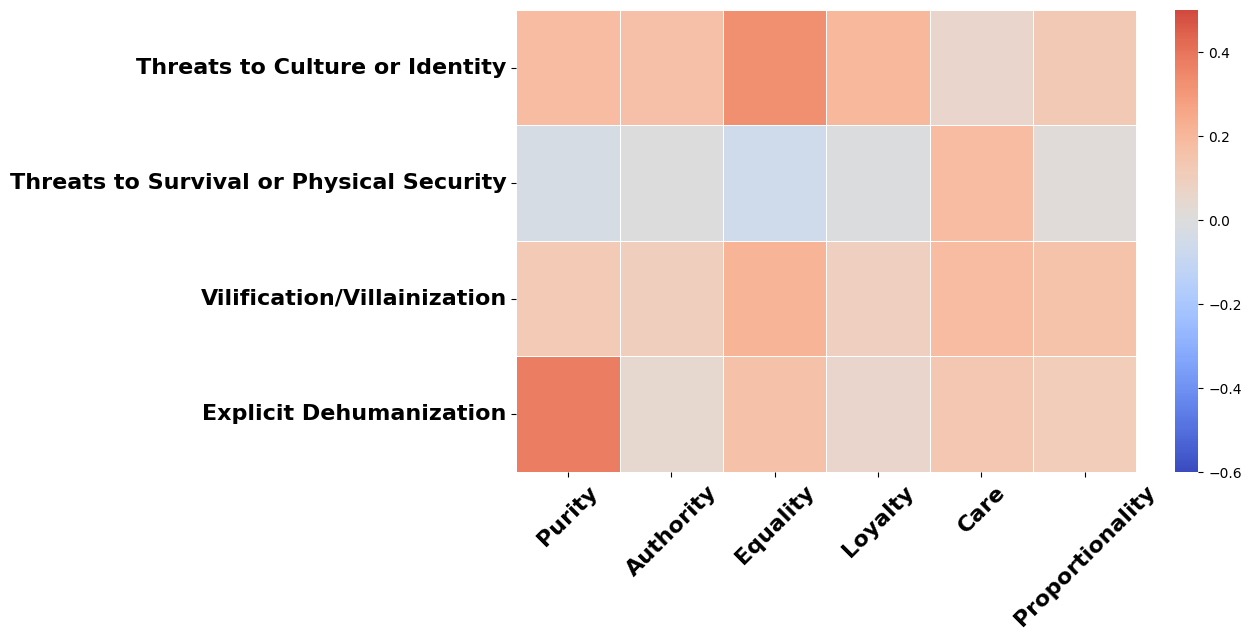

(-0.059323641586758, 0.3788022778005108)

In [7]:
# %pip install seaborn --upgrade
# del seaborn
import seaborn as sns
import seaborn
# print(seaborn.__version__)
# df_heatmap = extract_log_odds_for_heatmap(log_odds_results_ru)


# df_heatmap.to_csv('./overleaf_plots/log_odds_heatmap_ru_data.csv')
df_heatmap = pd.read_csv('./overleaf_plots/log_odds_heatmap_ru_data.csv', index_col=0)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))


# Create the heatmap using seaborn
sns.heatmap(df_heatmap, annot=False, cmap="coolwarm", center=0, linewidths=.5, vmin=-0.6, vmax=0.5)

# plt.xlim(-0.5, 1.5)
# plt.ylim(-0.5, 1.5)

# Customize the plot
# plt.figure(figsize=(10, 6))

# Create the heatmap without labels or title
# sns.heatmap(df_heatmap, annot=True, cmap="coolwarm", center=0, linewidths=.5)

# sns.heatmap(df_heatmap, annot=False, cmap="coolwarm", center=0, linewidths=.5)

# Customize the plot
# plt.title("Log-Odds Ratio of Morality Devices by Otherism Classes")
# plt.xlabel("Otherism Classes")
# plt.ylabel("Morality Devices")

# Save the plot to a file
plt.xticks(fontsize=16, fontweight='bold', rotation=45)
plt.yticks(fontsize=16, fontweight='bold')


plt.savefig("./overleaf_plots/log_odds_heatmap_ru1.pdf", dpi=300, bbox_inches='tight')


plt.show()

max_value = df_heatmap.max().max()
min_value = df_heatmap.min().min()
min_value, max_value



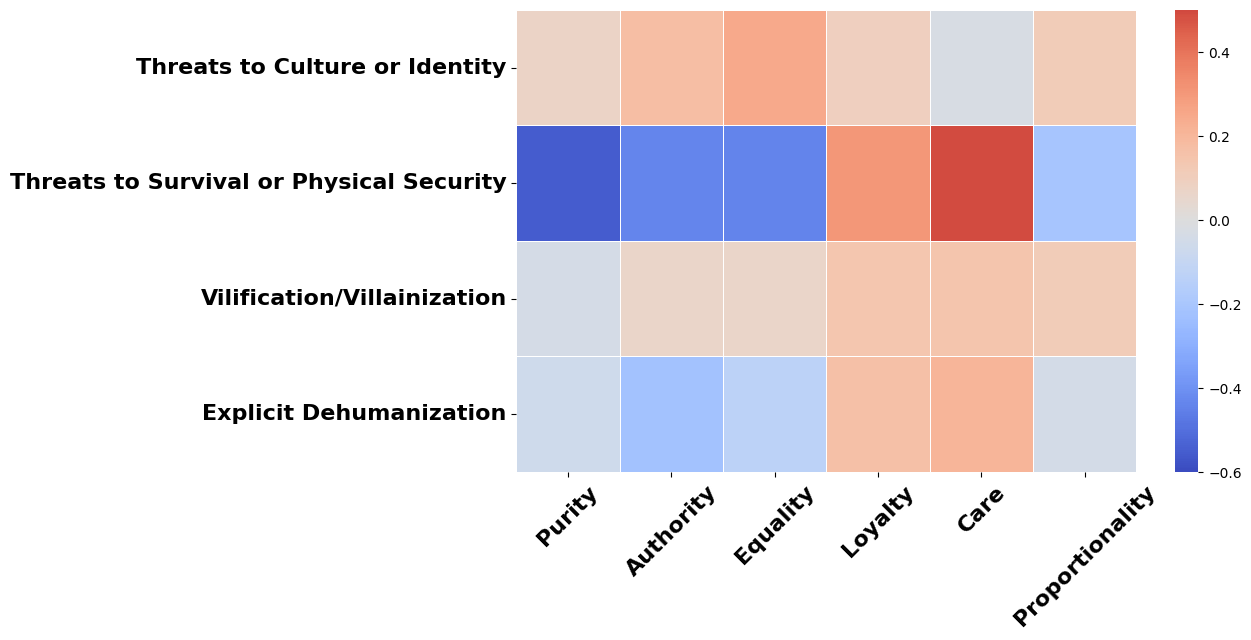

(-0.5527934184519685, 0.4936252690769425)

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# df_heatmap = extract_log_odds_for_heatmap(log_odds_results)
# df_heatmap.to_csv('./overleaf_plots/log_odds_heatmap_uk_data.csv')

df_heatmap = pd.read_csv('./overleaf_plots/log_odds_heatmap_uk_data.csv', index_col=0)
max_value = df_heatmap.max().max()
min_value = df_heatmap.min().min()


# # Set up the matplotlib figure
# plt.figure(figsize=(10, 6))

# # Create the heatmap using seaborn
# sns.heatmap(df_heatmap, annot=False, cmap="coolwarm", center=0, linewidths=.5)

# Customize the plot
plt.figure(figsize=(10, 6))

# Create the heatmap without labels or title
# sns.heatmap(df_heatmap, annot=True, cmap="coolwarm", center=0, linewidths=.5)

sns.heatmap(df_heatmap, annot=False, cmap="coolwarm", center=0, linewidths=.5, vmin=-0.6, vmax=0.5)

# Customize the plot
# plt.title("Log-Odds Ratio of Morality Devices by Otherism Classes")
# plt.xlabel("Otherism Classes")
# plt.ylabel("Morality Devices")
plt.xticks(fontsize=16, fontweight='bold', rotation=45)
plt.yticks(fontsize=16, fontweight='bold')


# Save the plot to a file
plt.savefig("./overleaf_plots/log_odds_heatmap_uk.pdf", dpi=300, bbox_inches='tight')

plt.show()

min_value, max_value


In [41]:
df_heatmap = extract_log_odds_for_heatmap(log_odds_results)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create the heatmap using seaborn
sns.heatmap(df_heatmap, annot=True, cmap="coolwarm", center=0, linewidths=.5)

# Customize the plot
plt.title("Log-Odds Ratio of Morality Devices by Otherism Classes")
plt.xlabel("Otherism Classes")
plt.ylabel("Morality Devices")

# Show the plot
plt.show()

IndexError: invalid index to scalar variable.

In [26]:
log_odds_results_ru_general = analyze_morality_against_otherism(df_binary_ru, ['Any_Otherism_Present'], morality_columns)

# Print the log-odds ratios for each morality and otherism combination
for otherism_class, morality_data in log_odds_results.items():
    print(f"Otherism Class: {otherism_class}")
    for morality_device, result in morality_data.items():
        print(f"  Morality Device: {morality_device}")
        print(f"    P(Morality | Otherism): {result['P(Morality | Otherism)']}")
        print(f"    P(Morality | No Otherism): {result['P(Morality | No Otherism)']}")
        print(f"    Log-Odds Ratio: {result['Log-Odds Ratio']}\n")


Otherism Class: Threats to Culture or Identity
  Morality Device: Purity
    P(Morality | Otherism): 0.000492854558524817
    P(Morality | No Otherism): 0.0004592462687557117
    Log-Odds Ratio: 0.07066114226524658

  Morality Device: Authority
    P(Morality | Otherism): 0.07269391072970013
    P(Morality | No Otherism): 0.06178100341421983
    Log-Odds Ratio: 0.17436138220864497

  Morality Device: Equality
    P(Morality | Otherism): 0.021851547268930505
    P(Morality | No Otherism): 0.017113180867605497
    Log-Odds Ratio: 0.2492552793271776

  Morality Device: Loyalty
    P(Morality | Otherism): 0.07127398630073245
    P(Morality | No Otherism): 0.06541410187877099
    Log-Odds Ratio: 0.09208332426255096

  Morality Device: Care
    P(Morality | Otherism): 0.1354822994941356
    P(Morality | No Otherism): 0.13878050273607254
    Log-Odds Ratio: -0.027874942138061895

  Morality Device: Proportionality
    P(Morality | Otherism): 0.05513133766804774
    P(Morality | No Otherism): 

In [27]:
log_odds_results_uk_general = analyze_morality_against_otherism(df_binary_uk, ['Any_Otherism_Present'], morality_columns)

# Print the log-odds ratios for each morality and otherism combination
for otherism_class, morality_data in log_odds_results.items():
    print(f"Otherism Class: {otherism_class}")
    for morality_device, result in morality_data.items():
        print(f"  Morality Device: {morality_device}")
        print(f"    P(Morality | Otherism): {result['P(Morality | Otherism)']}")
        print(f"    P(Morality | No Otherism): {result['P(Morality | No Otherism)']}")
        print(f"    Log-Odds Ratio: {result['Log-Odds Ratio']}\n")


Otherism Class: Threats to Culture or Identity
  Morality Device: Purity
    P(Morality | Otherism): 0.000492854558524817
    P(Morality | No Otherism): 0.0004592462687557117
    Log-Odds Ratio: 0.07066114226524658

  Morality Device: Authority
    P(Morality | Otherism): 0.07269391072970013
    P(Morality | No Otherism): 0.06178100341421983
    Log-Odds Ratio: 0.17436138220864497

  Morality Device: Equality
    P(Morality | Otherism): 0.021851547268930505
    P(Morality | No Otherism): 0.017113180867605497
    Log-Odds Ratio: 0.2492552793271776

  Morality Device: Loyalty
    P(Morality | Otherism): 0.07127398630073245
    P(Morality | No Otherism): 0.06541410187877099
    Log-Odds Ratio: 0.09208332426255096

  Morality Device: Care
    P(Morality | Otherism): 0.1354822994941356
    P(Morality | No Otherism): 0.13878050273607254
    Log-Odds Ratio: -0.027874942138061895

  Morality Device: Proportionality
    P(Morality | Otherism): 0.05513133766804774
    P(Morality | No Otherism): 

In [33]:
import numpy as np

def analyze_morality_against_any_otherism(df, morality_columns, otherism_columns, min_date=None, max_date=None):
    """
    Analyzes the log-odds ratio for each morality device against Any_Otherism_Present,
    comparing the probability of using each morality device given the presence or absence
    of any otherism.
    
    Parameters:
    - df: DataFrame containing the data to analyze.
    - morality_columns: List of columns corresponding to morality categories.
    - otherism_columns: List of columns corresponding to otherism categories.
    - min_date: Minimum date for filtering the DataFrame (optional).
    - max_date: Maximum date for filtering the DataFrame (optional).

    Returns:
    - Dictionary with log-odds ratios for each morality device against Any_Otherism_Present.
    """

    # Convert date column to datetime if filtering by date
    if min_date or max_date:
        df['date'] = pd.to_datetime(df['date'])
        if min_date:
            df = df[df['date'] >= min_date]
        if max_date:
            df = df[df['date'] <= max_date]

    # Create the binary column 'Any_Otherism_Present'
    df['Any_Otherism_Present'] = df[otherism_columns].max(axis=1)
    df['Any_Otherism_Present'] = df['Any_Otherism_Present'].apply(lambda x: 1 if x > 0 else 0)

    # Initialize a dictionary to store results for each morality device
    log_odds_results = {}

    # Iterate over each morality device
    for morality in morality_columns:
        # Messages where any otherism is present
        messages_with_otherism = df[df['Any_Otherism_Present'] == 1]
        # Messages where no otherism is present
        messages_without_otherism = df[df['Any_Otherism_Present'] == 0]

        # Calculate P(Morality | Any_Otherism) and P(Morality | No_Otherism)
        prob_morality_given_otherism = messages_with_otherism[morality].mean()  # P(Morality | Otherism)
        prob_morality_given_no_otherism = messages_without_otherism[morality].mean()  # P(Morality | No Otherism)

        # Calculate log-odds ratio if the probabilities are valid
        if prob_morality_given_otherism > 0 and prob_morality_given_no_otherism > 0:
            log_odds_ratio = np.log(
                (prob_morality_given_otherism / (1 - prob_morality_given_otherism)) /
                (prob_morality_given_no_otherism / (1 - prob_morality_given_no_otherism))
            )
        else:
            log_odds_ratio = None  # Cannot calculate log-odds if probabilities are zero

        # Store the results for the specific morality device
        log_odds_results[morality] = {
            "P(Morality | Otherism)": prob_morality_given_otherism,
            "P(Morality | No Otherism)": prob_morality_given_no_otherism,
            "Log-Odds Ratio": log_odds_ratio
        }

    return log_odds_results
    
# Assuming you have a DataFrame `df_binary` and defined otherism and morality columns
log_odds_results_any_otherism_ru = analyze_morality_against_any_otherism(df_binary_ru, morality_columns, otherism_columns)

# Print the results for each morality device
for morality_device, result in log_odds_results_any_otherism_ru.items():
    print(f"Morality Device: {morality_device}")
    print(f"  P(Morality | Any_Otherism_Present): {result['P(Morality | Otherism)']}")
    print(f"  P(Morality | No_Otherism_Present): {result['P(Morality | No Otherism)']}")
    print(f"  Log-Odds Ratio: {result['Log-Odds Ratio']}\n")


Morality Device: Purity
  P(Morality | Any_Otherism_Present): 0.000880642804159302
  P(Morality | No_Otherism_Present): 0.0007656636534908766
  Log-Odds Ratio: 0.14002419531201274

Morality Device: Authority
  P(Morality | Any_Otherism_Present): 0.08680388236238754
  P(Morality | No_Otherism_Present): 0.078654032295549
  Log-Odds Ratio: 0.10747739729610348

Morality Device: Equality
  P(Morality | Any_Otherism_Present): 0.02954032738093524
  P(Morality | No_Otherism_Present): 0.02398142016088509
  Log-Odds Ratio: 0.21418876351203334

Morality Device: Loyalty
  P(Morality | Any_Otherism_Present): 0.08546653102306052
  P(Morality | No_Otherism_Present): 0.07694341518818298
  Log-Odds Ratio: 0.11433103793160268

Morality Device: Care
  P(Morality | Any_Otherism_Present): 0.16879979715666826
  P(Morality | No_Otherism_Present): 0.14967405811340875
  Log-Odds Ratio: 0.14300244977281998

Morality Device: Proportionality
  P(Morality | Any_Otherism_Present): 0.06801743107122545
  P(Morality |

In [34]:
log_odds_results_any_otherism_uk = analyze_morality_against_any_otherism(df_binary_uk, morality_columns, otherism_columns)

# Print the results for each morality device
for morality_device, result in log_odds_results_any_otherism_uk.items():
    print(f"Morality Device: {morality_device}")
    print(f"  P(Morality | Any_Otherism_Present): {result['P(Morality | Otherism)']}")
    print(f"  P(Morality | No_Otherism_Present): {result['P(Morality | No Otherism)']}")
    print(f"  Log-Odds Ratio: {result['Log-Odds Ratio']}\n")


Morality Device: Purity
  P(Morality | Any_Otherism_Present): 0.0004330860972286581
  P(Morality | No_Otherism_Present): 0.0004687490930142288
  Log-Odds Ratio: -0.0791667743619622

Morality Device: Authority
  P(Morality | Any_Otherism_Present): 0.06378428354103664
  P(Morality | No_Otherism_Present): 0.06248080645348944
  Log-Odds Ratio: 0.02203872221232792

Morality Device: Equality
  P(Morality | Any_Otherism_Present): 0.01836685300314858
  P(Morality | No_Otherism_Present): 0.017329795191524864
  Log-Odds Ratio: 0.059176191315129134

Morality Device: Loyalty
  P(Morality | Any_Otherism_Present): 0.07456665683737025
  P(Morality | No_Otherism_Present): 0.06395422250735935
  Log-Odds Ratio: 0.16492816985608136

Morality Device: Care
  P(Morality | Any_Otherism_Present): 0.15553529253655662
  P(Morality | No_Otherism_Present): 0.13462348810890298
  Log-Odds Ratio: 0.1688525042521434

Morality Device: Proportionality
  P(Morality | Any_Otherism_Present): 0.052629082488804386
  P(Moral